In [113]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from plotnine import *

In [114]:
df = pd.read_csv("../data/tr_data_22_24.csv")

In [115]:
df

,site,mode,division,region,destination,shipping_date,invoice_date,usda_invoice_amount
0,US77,less_truck_load,NaN,EMEA,Amsterdam,2022-01-01,2022-01-27,715.603599
1,US62,std_air,F928,EMEA,Paris,2022-01-01,2022-01-02,368.346398
2,TH2E,full_container_load,E916,EMEA,Dubai,2022-01-01,2022-02-12,5605.915943
3,US77,exp_air,E174,EMEA,Amsterdam,2022-01-01,2022-01-07,1327.171393
4,US77,exp_air,E174,EMEA,Dubai,2022-01-01,2022-01-07,1237.849165
...,...,...,...,...,...,...,...,...
208794,TH2E,less_container_load,B1A2,AMER,Dallas,2024-12-30,2025-03-08,56223.045037
208795,US77,std_air,F928,AMER,New York,2024-12-30,2025-01-04,288.275800
208796,TH2E,exp_air,F928,AMER,Dallas,2024-12-30,2025-01-04,5986.953427
208797,US77,exp_air,E174,AMER,New York,2024-12-30,2025-01-03,6010.693601


In [116]:
df.info()
# 1 we can use df.info to see the  Non-Null Count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208799 entries, 0 to 208798
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   site                 200549 non-null  object 
 1   mode                 208157 non-null  object 
 2   division             185843 non-null  object 
 3   region               208799 non-null  object 
 4   destination          208799 non-null  object 
 5   shipping_date        208799 non-null  object 
 6   invoice_date         208799 non-null  object 
 7   usda_invoice_amount  208799 non-null  float64
dtypes: float64(1), object(7)
memory usage: 12.7+ MB


In [117]:
df.describe()

,usda_invoice_amount
count,208799.000000
mean,12779.144711
std,20643.474634
min,0.007612
25%,1432.595629
50%,3669.154932
75%,10689.671877
max,192806.675931


In [118]:
null_counts = df.isna().sum()
null_counts

site                    8250
mode                     642
division               22956
region                     0
destination                0
shipping_date              0
invoice_date               0
usda_invoice_amount        0
dtype: int64

In [119]:
null_info = pd.DataFrame(
    {"null_count": df.isna().sum(), "null_percentage": df.isna().mean() * 100}
)

null_info
# I only found Nan values in site, mode & division
# thery are about 10% or less

,null_count,null_percentage
site,8250,3.951168
mode,642,0.307473
division,22956,10.994306
region,0,0.000000
destination,0,0.000000
shipping_date,0,0.000000
invoice_date,0,0.000000
usda_invoice_amount,0,0.000000


In [120]:
df.loc[df["division"].isna()]
# Did not notice any pattern here

,site,mode,division,region,destination,shipping_date,invoice_date,usda_invoice_amount
0,US77,less_truck_load,NaN,EMEA,Amsterdam,2022-01-01,2022-01-27,715.603599
8,US62,parcel_grund,NaN,EMEA,Manchester,2022-01-01,2022-01-02,169.612828
14,US77,less_truck_load,NaN,EMEA,London,2022-01-01,2022-01-31,1521.062532
41,US77,less_truck_load,NaN,EMEA,London,2022-01-01,2022-01-20,9.453186
47,US77,less_truck_load,NaN,APAC,Kuala Lumpur,2022-01-01,2022-01-05,1125.127083
...,...,...,...,...,...,...,...,...
208741,US77,less_truck_load,NaN,AMER,Toronto,2024-12-30,2025-01-01,4645.264287
208753,US77,less_truck_load,NaN,AMER,Dallas,2024-12-30,2025-01-01,3310.522706
208771,US77,less_truck_load,NaN,AMER,New York,2024-12-30,2025-01-26,3733.890807
208780,US77,less_truck_load,NaN,AMER,New York,2024-12-30,2025-01-27,3750.509724


In [121]:
df.loc[df["division"].isna()].describe(include="all")

,site,mode,division,region,destination,shipping_date,invoice_date,usda_invoice_amount
count,22784,22784,0,22956,22956,22956,22956,22956.000000
unique,3,4,0,3,32,1095,1134,NaN
top,US77,less_truck_load,NaN,AMER,New York,2024-02-06,2023-06-09,NaN
freq,17824,17824,NaN,11120,3809,37,35,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6053.909572
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12039.352765
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.072129
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1496.049800
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2866.052866
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4801.180023


In [122]:
df.describe(include="all")

,site,mode,division,region,destination,shipping_date,invoice_date,usda_invoice_amount
count,200549,208157,185843,208799,208799,208799,208799,208799.000000
unique,5,9,12,3,32,1095,1211,NaN
top,US77,less_truck_load,AF4C,AMER,New York,2023-11-14,2023-10-06,NaN
freq,113989,41413,46703,101886,35119,236,244,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12779.144711
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20643.474634
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007612
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1432.595629
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3669.154932
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10689.671877


In [123]:
df.loc[df["site"].isna()]

,site,mode,division,region,destination,shipping_date,invoice_date,usda_invoice_amount
35,NaN,parcel_air,AF4C,EMEA,Paris,2022-01-01,2022-01-02,182.970141
134,NaN,less_container_load,AF4C,AMER,Dallas,2022-01-01,2022-04-15,15060.395775
159,NaN,parcel_air,AF4C,AMER,Dallas,2022-01-01,2022-01-02,511.210126
170,NaN,std_air,B13D,AMER,New York,2022-01-01,2022-01-03,409.520436
210,NaN,parcel_grund,B1A2,EMEA,Paris,2022-01-02,2022-01-03,480.444891
...,...,...,...,...,...,...,...,...
208628,NaN,truck_load,B13D,EMEA,Madrid,2024-12-30,2025-01-11,4555.358427
208713,NaN,truck_load,B13D,AMER,Dallas,2024-12-30,2025-01-19,944.186993
208743,NaN,parcel_air,AF4C,AMER,Philadelphia,2024-12-30,2024-12-31,1703.431697
208749,NaN,std_air,B13D,AMER,Dallas,2024-12-30,2025-01-06,504.805141


In [124]:
df.loc[df["mode"].isna()]

,site,mode,division,region,destination,shipping_date,invoice_date,usda_invoice_amount
73,US77,NaN,B1A2,APAC,Kuala Lumpur,2022-01-01,2022-01-03,177.548545
222,US77,NaN,B1A2,EMEA,Kyiv,2022-01-02,2022-01-04,221.123656
673,CH22,NaN,D6C9,AMER,New York,2022-01-04,2022-01-05,11.734341
757,NaN,NaN,NaN,EMEA,Istanbul,2022-01-05,2022-01-07,60.011364
1024,NaN,NaN,NaN,AMER,New York,2022-01-06,2022-01-07,176.587104
...,...,...,...,...,...,...,...,...
207804,US77,NaN,B1A2,AMER,New York,2024-12-25,2024-12-30,147.286480
208055,US77,NaN,502D,EMEA,Milan,2024-12-27,2025-01-02,61.866551
208323,NaN,NaN,NaN,AMER,Dallas,2024-12-28,2025-01-01,95.148625
208521,US77,NaN,502D,AMER,Toronto,2024-12-29,2025-01-05,62.050062


In [125]:
# we do not see any patterns here, therefore we want to keep the information as is, but will use df_1 to see  if it makes a difference later on if we remove the nan values

In [126]:
df_1 = df.loc[~df["division"].isna()]
df_1 = df.loc[~df["site"].isna()]
df_1 = df.loc[~df["mode"].isna()]

In [127]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208157 entries, 0 to 208798
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   site                 200079 non-null  object 
 1   mode                 208157 non-null  object 
 2   division             185373 non-null  object 
 3   region               208157 non-null  object 
 4   destination          208157 non-null  object 
 5   shipping_date        208157 non-null  object 
 6   invoice_date         208157 non-null  object 
 7   usda_invoice_amount  208157 non-null  float64
dtypes: float64(1), object(7)
memory usage: 14.3+ MB


In [128]:
df["usda_invoice_amount"].describe()[["mean", "min", "max"]]

mean     12779.144711
min          0.007612
max     192806.675931
Name: usda_invoice_amount, dtype: float64

In [129]:
# The min and max are bizarre, we shall investigate!

In [130]:
df[df["usda_invoice_amount"] < 50]

,site,mode,division,region,destination,shipping_date,invoice_date,usda_invoice_amount
41,US77,less_truck_load,NaN,EMEA,London,2022-01-01,2022-01-20,9.453186
173,TH2E,full_container_load,E916,AMER,New York,2022-01-01,2022-02-02,30.510523
261,CH22,less_truck_load,D6C9,APAC,Shanghai,2022-01-02,2022-01-24,22.398911
275,CH22,less_truck_load,D6C9,APAC,Tokyo,2022-01-02,2022-01-03,49.749978
542,US77,less_truck_load,NaN,AMER,Dallas,2022-01-03,2022-01-21,13.541691
...,...,...,...,...,...,...,...,...
208235,NaN,other,E174,EMEA,Kyiv,2024-12-28,2025-01-01,49.278093
208266,US77,other,E916,APAC,Shanghai,2024-12-28,2024-12-29,39.172152
208282,TH2E,std_air,98F8,APAC,Shanghai,2024-12-28,2025-01-06,15.048092
208420,CH22,parcel_grund,98F8,EMEA,Kyiv,2024-12-29,2024-12-30,15.567642


In [131]:
df[df["usda_invoice_amount"] < 20]

,site,mode,division,region,destination,shipping_date,invoice_date,usda_invoice_amount
41,US77,less_truck_load,NaN,EMEA,London,2022-01-01,2022-01-20,9.453186
542,US77,less_truck_load,NaN,AMER,Dallas,2022-01-03,2022-01-21,13.541691
673,CH22,NaN,D6C9,AMER,New York,2022-01-04,2022-01-05,11.734341
821,US77,parcel_grund,F928,APAC,Kuala Lumpur,2022-01-05,2022-01-06,4.143443
864,CH22,parcel_grund,98F8,AMER,Dallas,2022-01-05,2022-01-06,6.347372
...,...,...,...,...,...,...,...,...
207933,US77,std_air,AF4C,APAC,Dhaka,2024-12-26,2025-01-07,0.925581
208086,US77,parcel_grund,F928,APAC,Kuala Lumpur,2024-12-27,2024-12-28,16.770260
208230,CH22,std_air,502D,EMEA,Istanbul,2024-12-28,2024-12-31,7.726627
208282,TH2E,std_air,98F8,APAC,Shanghai,2024-12-28,2025-01-06,15.048092


In [132]:
df[df["usda_invoice_amount"] < 10]

,site,mode,division,region,destination,shipping_date,invoice_date,usda_invoice_amount
41,US77,less_truck_load,NaN,EMEA,London,2022-01-01,2022-01-20,9.453186
821,US77,parcel_grund,F928,APAC,Kuala Lumpur,2022-01-05,2022-01-06,4.143443
864,CH22,parcel_grund,98F8,AMER,Dallas,2022-01-05,2022-01-06,6.347372
1391,TH2E,less_truck_load,0790,APAC,Tokyo,2022-01-08,2022-01-31,3.921190
1587,NL6F,less_truck_load,8C75,APAC,Sydney,2022-01-09,2022-01-11,5.610084
...,...,...,...,...,...,...,...,...
206525,CH22,other,98F8,AMER,New York,2024-12-18,2024-12-24,8.239123
206890,NL6F,full_container_load,NaN,AMER,Mexico City,2024-12-20,2025-02-09,1.078390
207367,US62,truck_load,B1A2,APAC,Tokyo,2024-12-23,2025-01-08,4.722745
207933,US77,std_air,AF4C,APAC,Dhaka,2024-12-26,2025-01-07,0.925581


In [133]:
df[df["usda_invoice_amount"] < 1]

,site,mode,division,region,destination,shipping_date,invoice_date,usda_invoice_amount
2263,US77,truck_load,AF4C,AMER,Mexico City,2022-01-12,2022-01-20,0.599906
4406,US77,less_truck_load,NaN,EMEA,Istanbul,2022-01-24,2022-02-20,0.763053
5622,NaN,parcel_grund,B1A2,AMER,New York,2022-01-30,2022-01-31,0.942362
5794,US77,less_truck_load,B1A2,APAC,Delhi,2022-01-31,2022-02-03,0.082877
7636,US62,truck_load,B1A2,AMER,New York,2022-02-09,2022-02-19,0.061261
9478,US77,parcel_grund,F928,APAC,Kuala Lumpur,2022-02-19,2022-02-20,0.221348
13434,US77,truck_load,BF10,EMEA,Paris,2022-03-12,2022-03-27,0.881470
17329,US77,parcel_grund,E916,APAC,Tokyo,2022-04-01,2022-04-02,0.360881
28639,US77,truck_load,BF10,AMER,New York,2022-05-30,2022-06-08,0.551109
29819,US77,less_truck_load,NaN,AMER,Dallas,2022-06-05,2022-07-03,0.984496


In [134]:
df[df["usda_invoice_amount"] > 100000]

,site,mode,division,region,destination,shipping_date,invoice_date,usda_invoice_amount
23790,US62,full_container_load,F928,AMER,Philadelphia,2022-05-05,2022-05-28,100441.682404
29886,US77,full_container_load,D6C9,APAC,Perth,2022-06-06,2022-06-09,110648.793767
31668,TH2E,full_container_load,E916,AMER,Philadelphia,2022-06-15,2022-08-08,110480.000616
31700,TH2E,full_container_load,E916,AMER,Philadelphia,2022-06-15,2022-06-18,101063.300170
33248,US62,full_container_load,F928,EMEA,Baghdad,2022-06-24,2022-07-05,105537.518715
...,...,...,...,...,...,...,...,...
203051,US77,less_container_load,98F8,AMER,New York,2024-11-30,2025-02-25,106267.346694
203056,US62,less_container_load,8C75,AMER,New York,2024-11-30,2025-02-15,104662.198160
203058,NaN,less_container_load,AF4C,AMER,Philadelphia,2024-11-30,2025-01-07,100341.475368
203062,US62,less_container_load,8C75,AMER,Toronto,2024-11-30,2025-01-15,132269.035089


In [135]:
df[df["usda_invoice_amount"] > 150000]

,site,mode,division,region,destination,shipping_date,invoice_date,usda_invoice_amount
40871,US77,full_container_load,D6C9,EMEA,Istanbul,2022-08-03,2022-09-23,172138.157868
47203,TH2E,full_container_load,E916,APAC,Perth,2022-09-05,2022-09-18,166732.405650
51877,TH2E,full_container_load,E916,APAC,Tokyo,2022-09-29,2022-11-08,154968.532791
55344,US77,full_container_load,D6C9,EMEA,Paris,2022-10-18,2022-10-19,155845.777849
57407,US77,full_container_load,D6C9,AMER,Dallas,2022-10-28,2022-11-05,164831.873024
57734,US62,full_container_load,F928,APAC,Perth,2022-10-30,2022-11-15,159891.757007
59391,US62,full_container_load,F928,AMER,Dallas,2022-11-07,2022-12-06,165678.622415
59662,US77,full_container_load,AF4C,AMER,Philadelphia,2022-11-09,2022-12-20,177886.388241
61464,US77,full_container_load,D6C9,EMEA,Kyiv,2022-11-19,2023-01-03,150484.873843
115540,CH22,full_container_load,B13D,APAC,Perth,2023-08-28,2023-09-27,156802.180676


In [136]:
avg_invoice = df["usda_invoice_amount"].mean()
min_invoice = df["usda_invoice_amount"].min()
max_invoice = df["usda_invoice_amount"].max()

In [137]:
avg_invoice

np.float64(12779.144710981744)

In [138]:
max_invoice

np.float64(192806.67593128016)

In [139]:
min_invoice

np.float64(0.0076120185195449)

In [140]:
df.describe()

,usda_invoice_amount
count,208799.000000
mean,12779.144711
std,20643.474634
min,0.007612
25%,1432.595629
50%,3669.154932
75%,10689.671877
max,192806.675931


In [141]:
df

,site,mode,division,region,destination,shipping_date,invoice_date,usda_invoice_amount
0,US77,less_truck_load,NaN,EMEA,Amsterdam,2022-01-01,2022-01-27,715.603599
1,US62,std_air,F928,EMEA,Paris,2022-01-01,2022-01-02,368.346398
2,TH2E,full_container_load,E916,EMEA,Dubai,2022-01-01,2022-02-12,5605.915943
3,US77,exp_air,E174,EMEA,Amsterdam,2022-01-01,2022-01-07,1327.171393
4,US77,exp_air,E174,EMEA,Dubai,2022-01-01,2022-01-07,1237.849165
...,...,...,...,...,...,...,...,...
208794,TH2E,less_container_load,B1A2,AMER,Dallas,2024-12-30,2025-03-08,56223.045037
208795,US77,std_air,F928,AMER,New York,2024-12-30,2025-01-04,288.275800
208796,TH2E,exp_air,F928,AMER,Dallas,2024-12-30,2025-01-04,5986.953427
208797,US77,exp_air,E174,AMER,New York,2024-12-30,2025-01-03,6010.693601


In [142]:
p = ggplot(data=df, mapping=aes(x="site"))

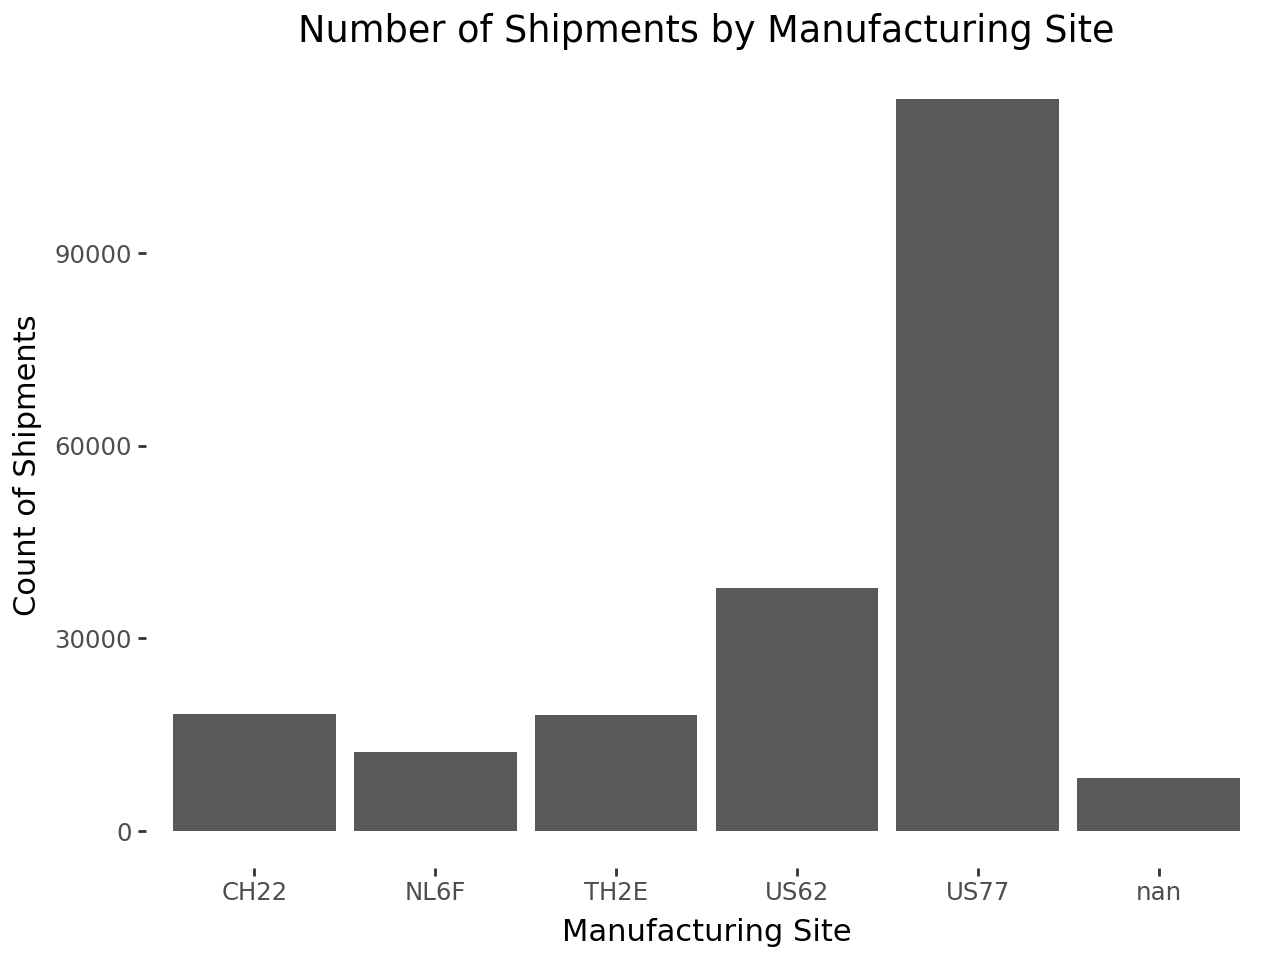

In [143]:
(
    p
    + geom_bar()
    + labs(
        title="Number of Shipments by Manufacturing Site",
        x="Manufacturing Site",
        y="Count of Shipments",
    )
    + theme_tufte()
)

Site "Us77" has the largest number of transportation tasks

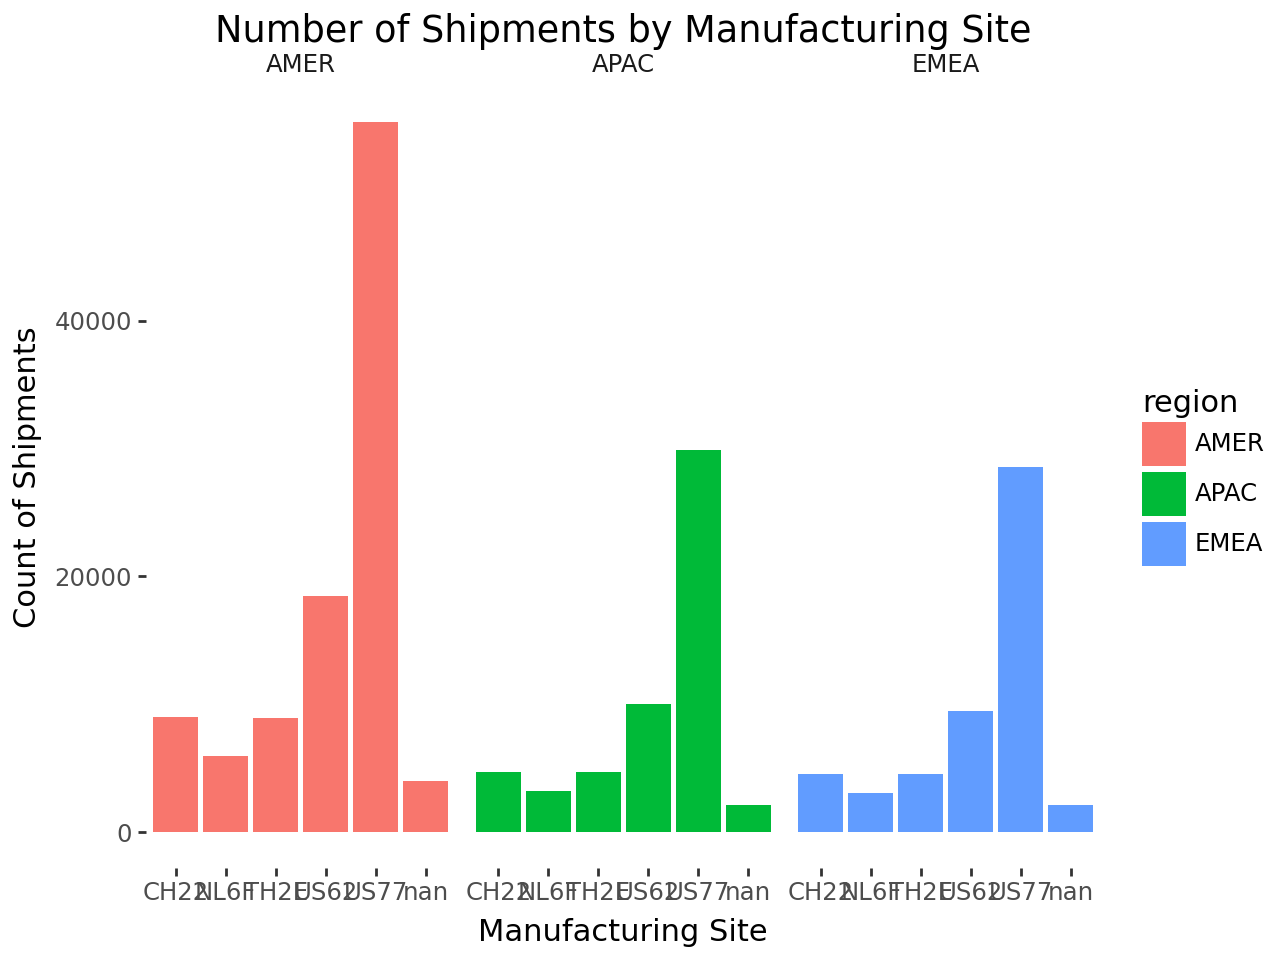

In [144]:
p = ggplot(data=df, mapping=aes(x="site", fill="region"))
(
    p
    + geom_bar(position="dodge")
    + labs(
        title="Number of Shipments by Manufacturing Site",
        x="Manufacturing Site",
        y="Count of Shipments",
    )
    + facet_wrap("region")
    + theme(legend_position="none")
    + theme_tufte()
)

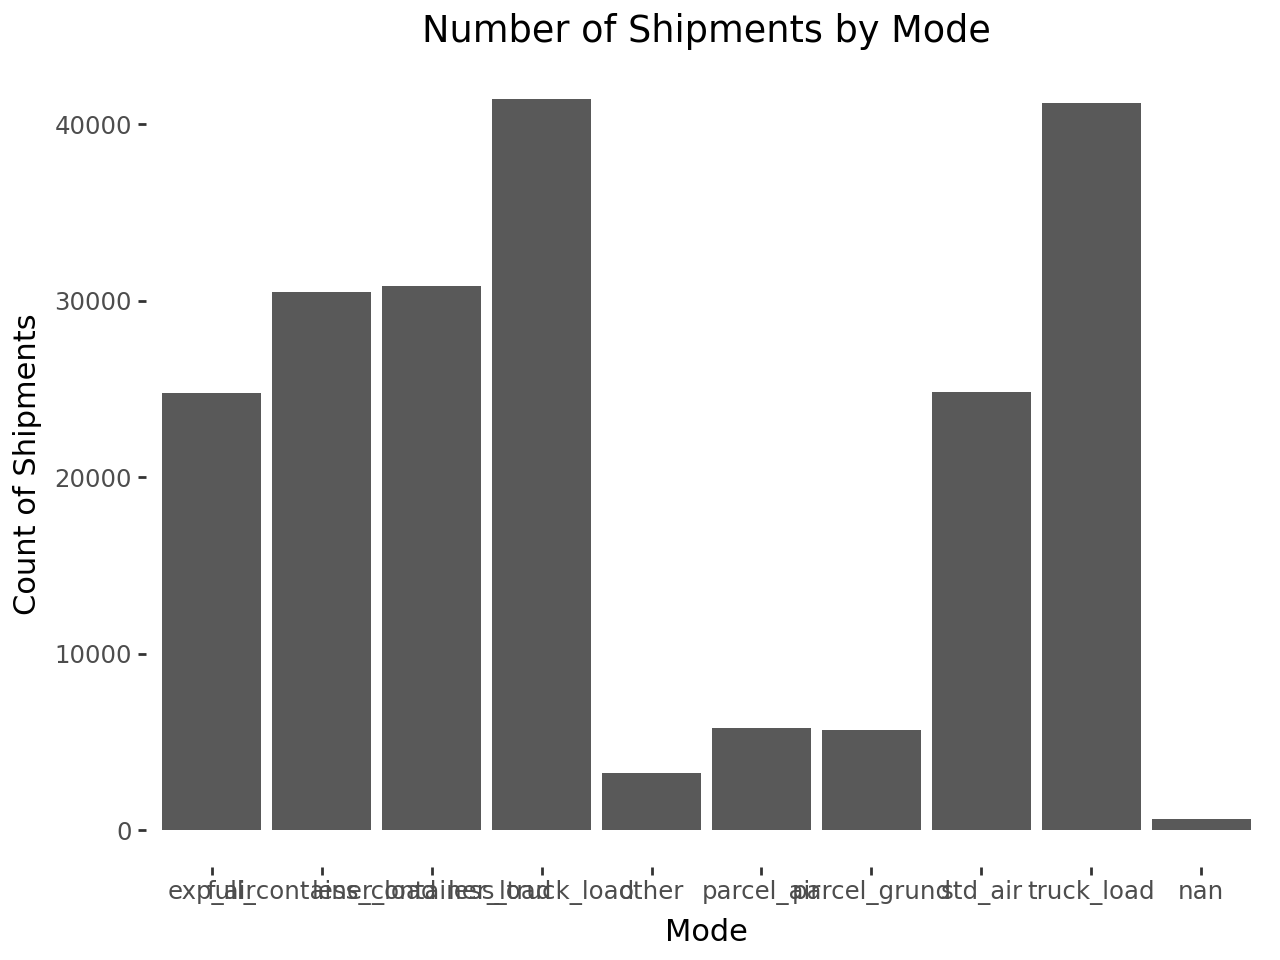

In [145]:
p2 = ggplot(data=df, mapping=aes(x="mode"))
(
    p2
    + geom_bar(position="dodge")
    + labs(title="Number of Shipments by Mode", x="Mode", y="Count of Shipments")
    + theme(axis_text_x=element_text(rotation=30, ha="right"))
    + theme_tufte()
)

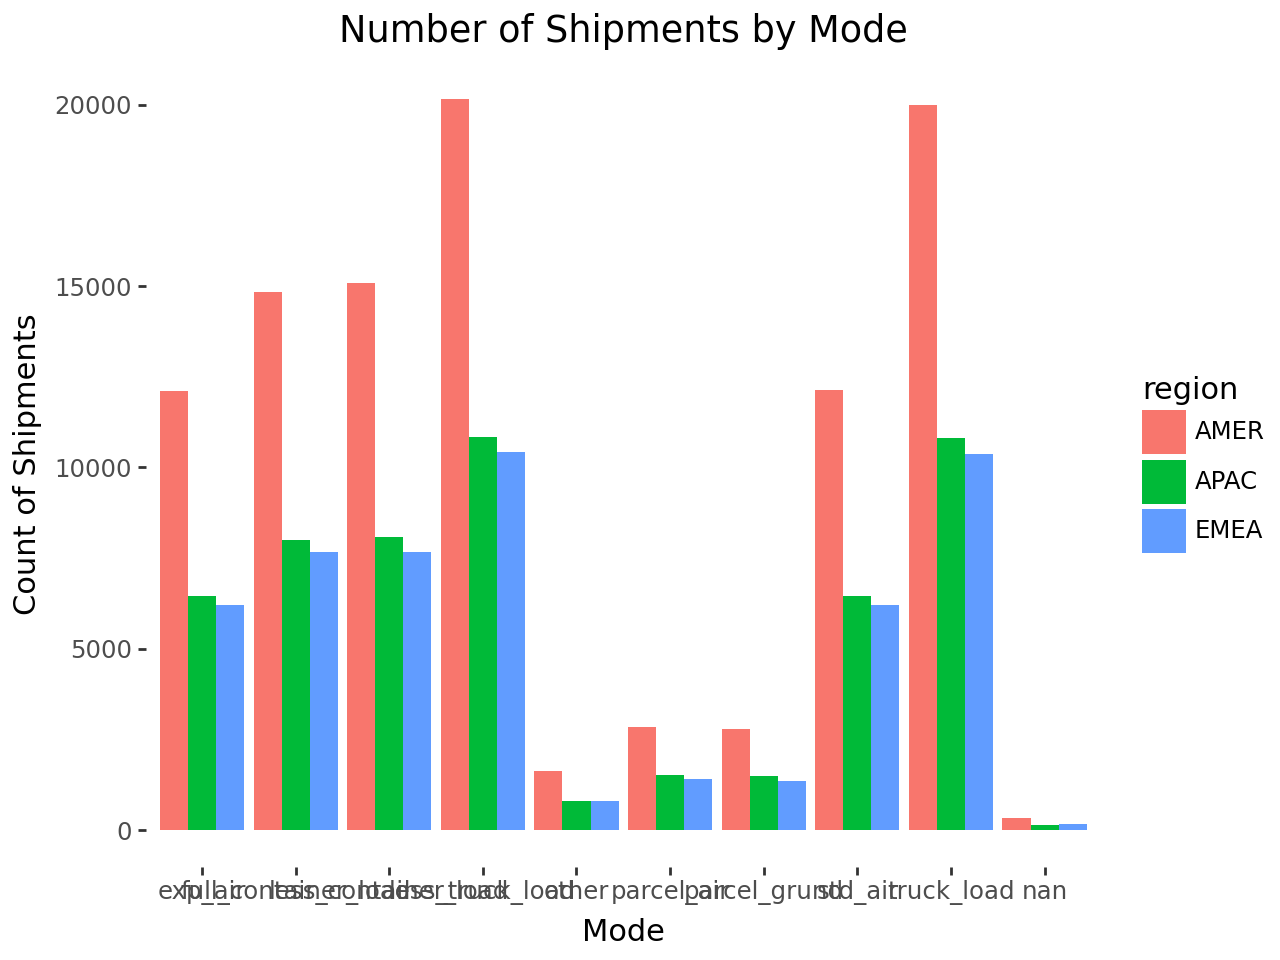

In [146]:
p3 = ggplot(data=df, mapping=aes(x="mode", fill="region"))
(
    p3
    + geom_bar(position="dodge")
    + labs(title="Number of Shipments by Mode", x="Mode", y="Count of Shipments")
    + theme(axis_text_x=element_text(rotation=30, ha="right"))
    + theme(legend_position="top")
    + theme_tufte()
)

In [147]:
df["shipping_date"] = pd.to_datetime(df["shipping_date"])
df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["delay"] = df["invoice_date"] - df["shipping_date"]
df

,site,mode,division,region,destination,shipping_date,invoice_date,usda_invoice_amount,delay
0,US77,less_truck_load,NaN,EMEA,Amsterdam,2022-01-01,2022-01-27,715.603599,26 days
1,US62,std_air,F928,EMEA,Paris,2022-01-01,2022-01-02,368.346398,1 days
2,TH2E,full_container_load,E916,EMEA,Dubai,2022-01-01,2022-02-12,5605.915943,42 days
3,US77,exp_air,E174,EMEA,Amsterdam,2022-01-01,2022-01-07,1327.171393,6 days
4,US77,exp_air,E174,EMEA,Dubai,2022-01-01,2022-01-07,1237.849165,6 days
...,...,...,...,...,...,...,...,...,...
208794,TH2E,less_container_load,B1A2,AMER,Dallas,2024-12-30,2025-03-08,56223.045037,68 days
208795,US77,std_air,F928,AMER,New York,2024-12-30,2025-01-04,288.275800,5 days
208796,TH2E,exp_air,F928,AMER,Dallas,2024-12-30,2025-01-04,5986.953427,5 days
208797,US77,exp_air,E174,AMER,New York,2024-12-30,2025-01-03,6010.693601,4 days


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208799 entries, 0 to 208798
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype          
---  ------               --------------   -----          
 0   site                 200549 non-null  object         
 1   mode                 208157 non-null  object         
 2   division             185843 non-null  object         
 3   region               208799 non-null  object         
 4   destination          208799 non-null  object         
 5   shipping_date        208799 non-null  datetime64[ns] 
 6   invoice_date         208799 non-null  datetime64[ns] 
 7   usda_invoice_amount  208799 non-null  float64        
 8   delay                208799 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), object(5), timedelta64[ns](1)
memory usage: 14.3+ MB


In [149]:
df["delay"].max()

Timedelta('120 days 00:00:00')

In [150]:
df["delay"].min()

Timedelta('1 days 00:00:00')

In [151]:
df_delay = df[df["delay"].dt.days > 80]
df_delay

,site,mode,division,region,destination,shipping_date,invoice_date,usda_invoice_amount,delay
20,NL6F,less_container_load,D6C9,EMEA,Baghdad,2022-01-01,2022-04-25,13079.065685,114 days
45,US77,less_container_load,98F8,APAC,Shanghai,2022-01-01,2022-04-22,28704.993289,111 days
46,CH22,less_container_load,0790,APAC,Delhi,2022-01-01,2022-04-06,24058.870154,95 days
60,US77,less_container_load,98F8,APAC,Seol,2022-01-01,2022-04-24,1274.646078,113 days
71,NL6F,less_container_load,D6C9,APAC,Shanghai,2022-01-01,2022-04-05,11243.698633,94 days
...,...,...,...,...,...,...,...,...,...
208684,US77,less_container_load,98F8,APAC,Perth,2024-12-30,2025-04-23,62811.975812,114 days
208702,US77,less_container_load,98F8,APAC,Sydney,2024-12-30,2025-04-25,48385.723175,116 days
208737,CH22,less_container_load,0790,AMER,Santo Domingo,2024-12-30,2025-04-20,51814.940320,111 days
208760,CH22,less_container_load,0790,AMER,New York,2024-12-30,2025-04-11,50814.165984,102 days


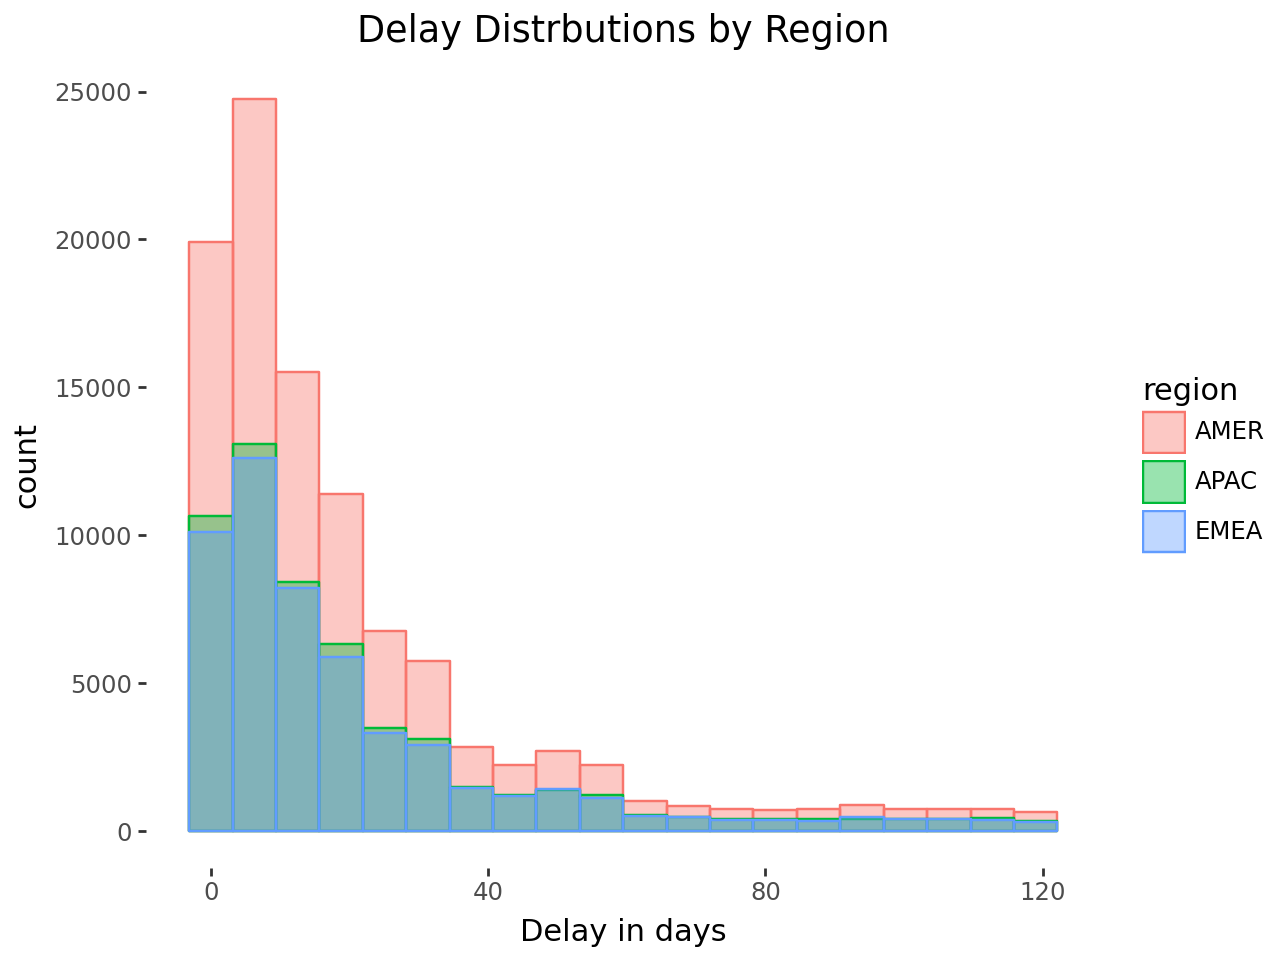

In [152]:
ph_region = ggplot(
    data=df, mapping=aes(x=df["delay"].dt.days, fill="region", color="region")
)
(
    ph_region
    + geom_histogram(alpha=0.4, position="identity", bins=20)
    + labs(title="Delay Distrbutions by Region", x="Delay in days", y="count")
    + theme(legend_position="top")
    + theme_tufte()
)
# How is the delay distributed between regions

I noticed that Region " Amer" is has teh highest delays, but thats not telling the
 real story since we established above that
that region has the most transportaions
i added x=df["delay"].dt.days to make it easier to read since our data is in days 
added color="region" so its easier to see the differance between "APAC" & "EMEA"

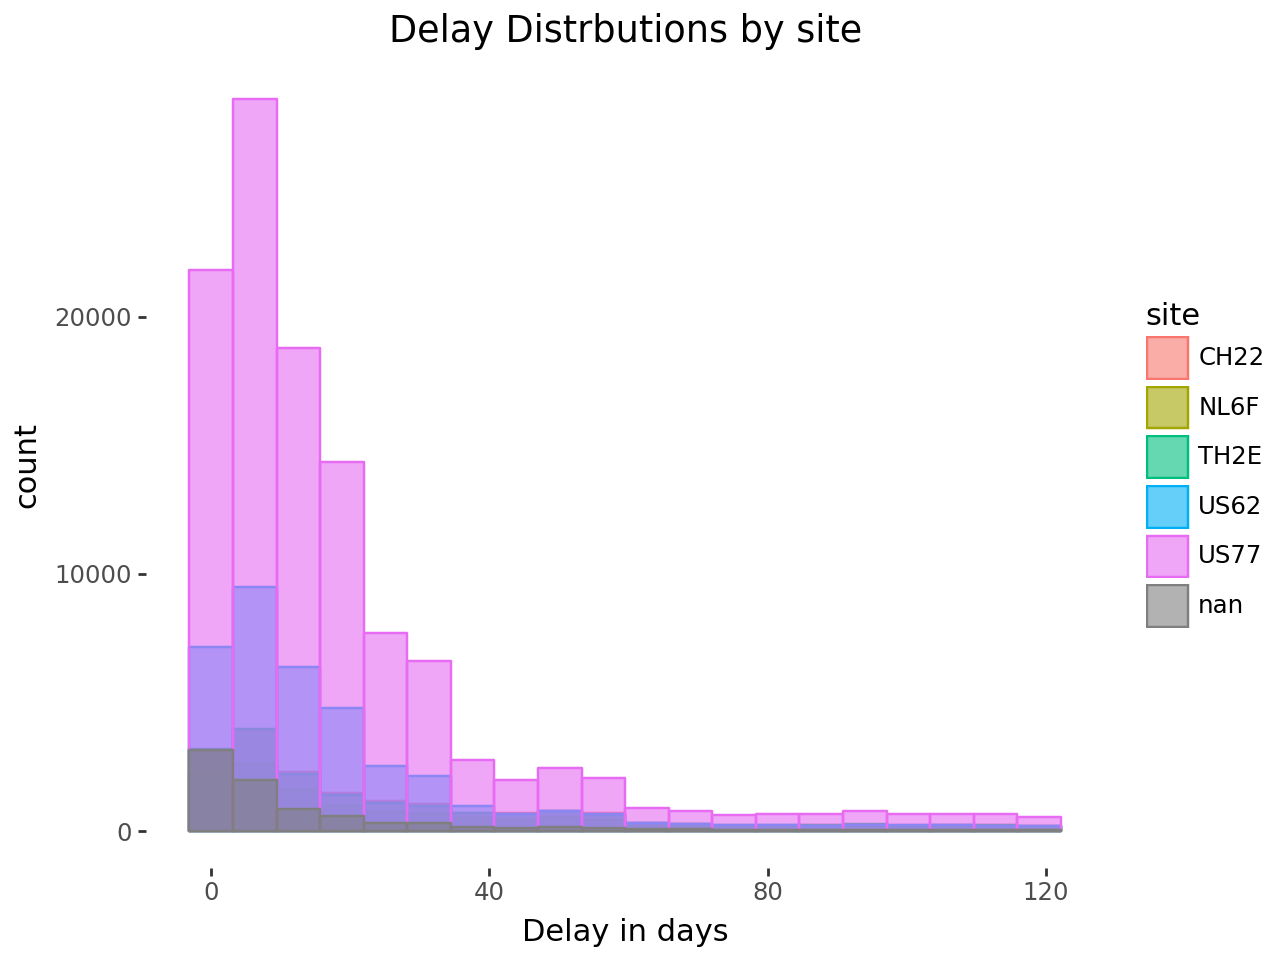

In [153]:
ph_site = ggplot(data=df, mapping=aes(x=df["delay"].dt.days, fill="site", color="site"))
(
    ph_site
    + geom_histogram(alpha=0.6, position="identity", bins=20)
    + labs(title="Delay Distrbutions by site", x="Delay in days", y="count")
    + theme(legend_position="top")
    + theme_tufte()
)
# How is the delay distributed across different sites

Again we already know that Site "US77" has the most transportaions so its not really telling the true story here
followed the same as above visualization

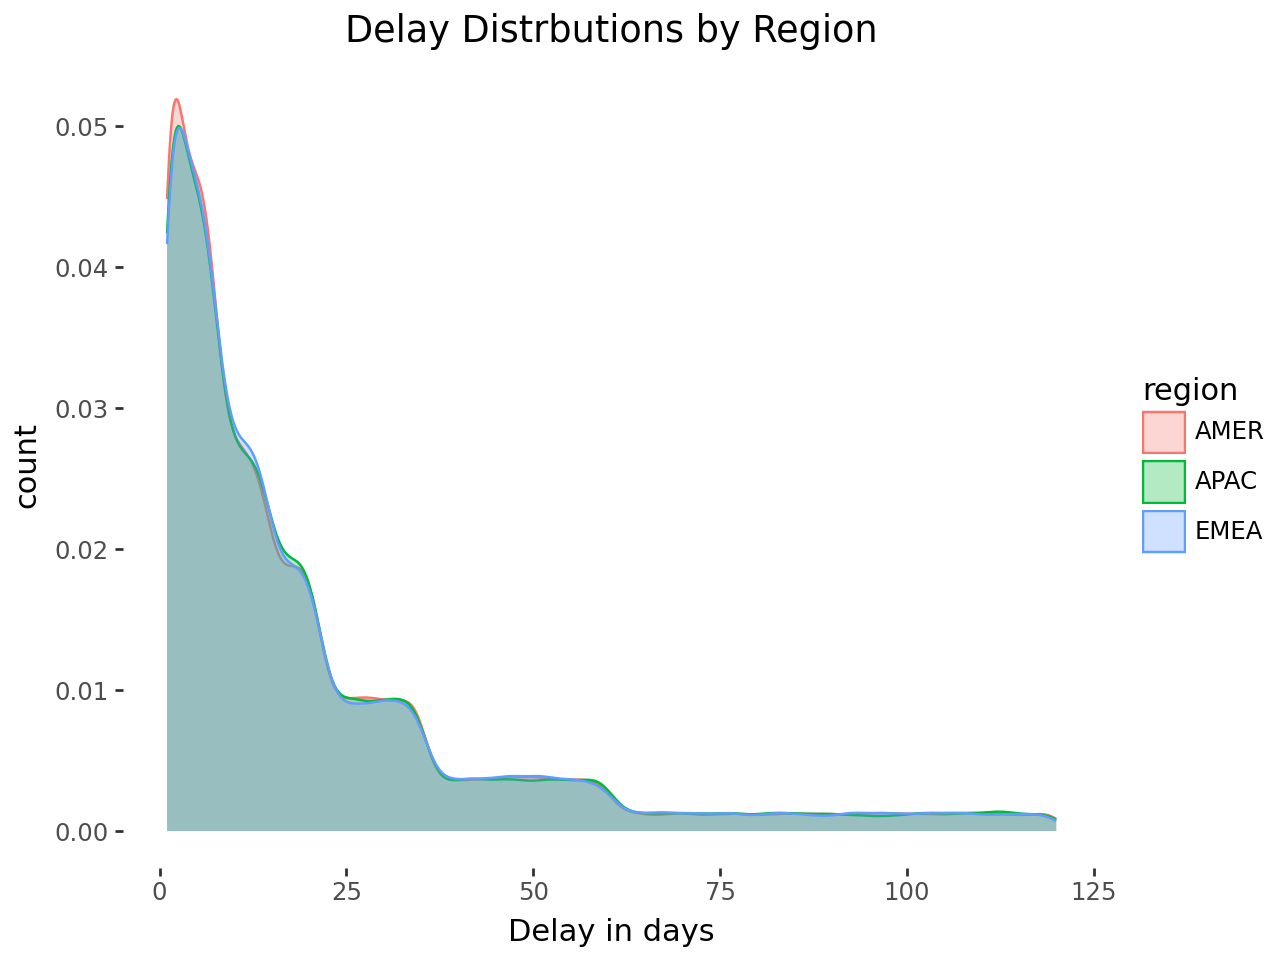

In [154]:
pd_region = ggplot(
    data=df, mapping=aes(x=df["delay"].dt.days, color="region", fill="region")
)
(
    pd_region
    + geom_density(alpha=0.3)
    + labs(title="Delay Distrbutions by Region", x="Delay in days", y="count")
    + theme(legend_position="top")
    + theme_tufte()
)
# How is the delay distributed across different regions

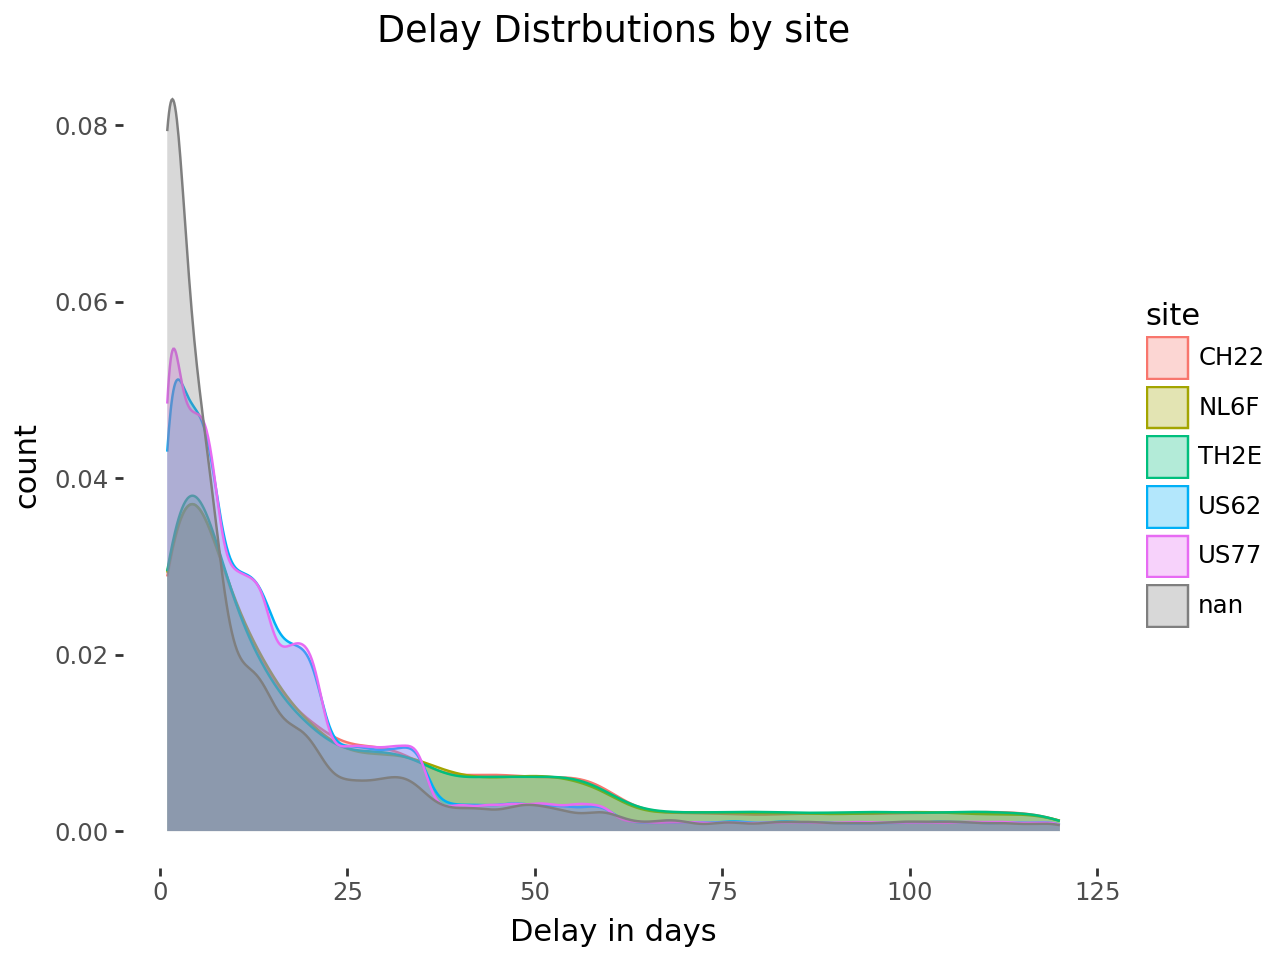

In [155]:
pd_site = ggplot(data=df, mapping=aes(x=df["delay"].dt.days, color="site", fill="site"))
(
    pd_site
    + geom_density(alpha=0.3)
    + labs(title="Delay Distrbutions by site", x="Delay in days", y="count")
    + theme(legend_position="top")
    + theme_tufte()
)
# How is delay distributed across different sites

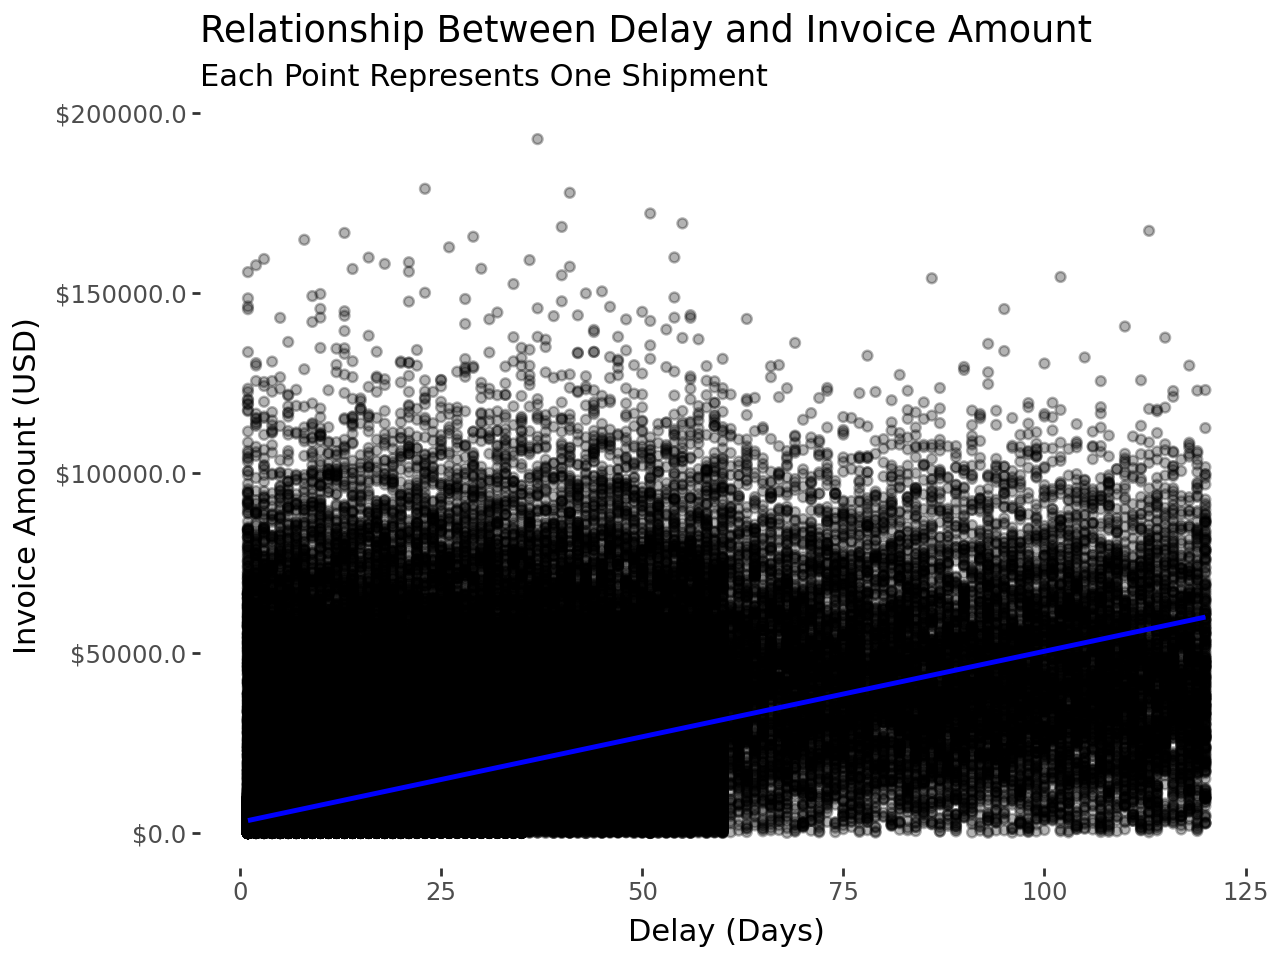

In [156]:
p_delay_invoice = ggplot(
    data=df, mapping=aes(x=df["delay"].dt.days, y="usda_invoice_amount")
)
(
    p_delay_invoice
    + geom_point(alpha=0.3)
    + geom_smooth(color="blue")
    + labs(
        title="Relationship Between Delay and Invoice Amount",
        subtitle="Each Point Represents One Shipment ",
        x="Delay (Days)",
        y="Invoice Amount (USD)",
    )
    + scale_y_continuous(labels=lambda x: ["$" + str(val) for val in x])
    + theme_tufte()
)

- **There is a clear positive relationship between Delay and invoice amount**.  
- This scatterplot shows the relationship between Delay and invoicing(in days) and the corresponding invoice amount (in $).   
- Without using the smooth line, the points are widely spread without a clear upward or downward trend.  


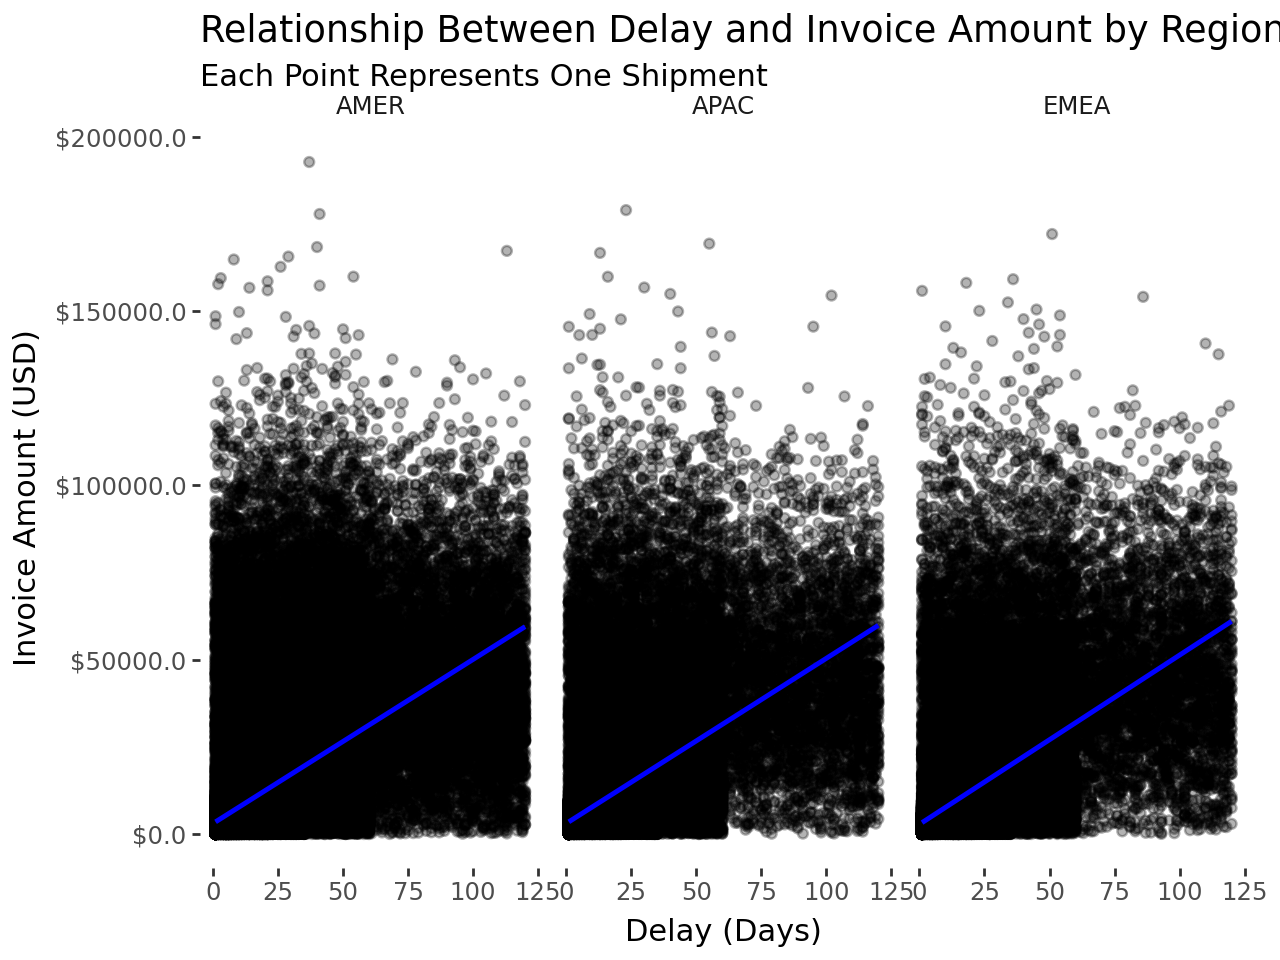

In [157]:
p_delay_invoice_region = ggplot(
    data=df, mapping=aes(x=df["delay"].dt.days, y="usda_invoice_amount")
)
(
    p_delay_invoice_region
    + geom_point(alpha=0.3)
    + geom_smooth(color="blue")
    + labs(
        title="Relationship Between Delay and Invoice Amount by Region",
        subtitle="Each Point Represents One Shipment ",
        x="Delay (Days)",
        y="Invoice Amount (USD)",
    )
    + scale_y_continuous(labels=lambda x: ["$" + str(val) for val in x])
    + facet_wrap("region")
    + theme_tufte()
)

**There is a clear positive relationship between delay and invoice amount in each and all regions**
- This scatterplot shows the relationship between delay and invoicing(in days) and the corresponding invoice amount (in $) in each region.   


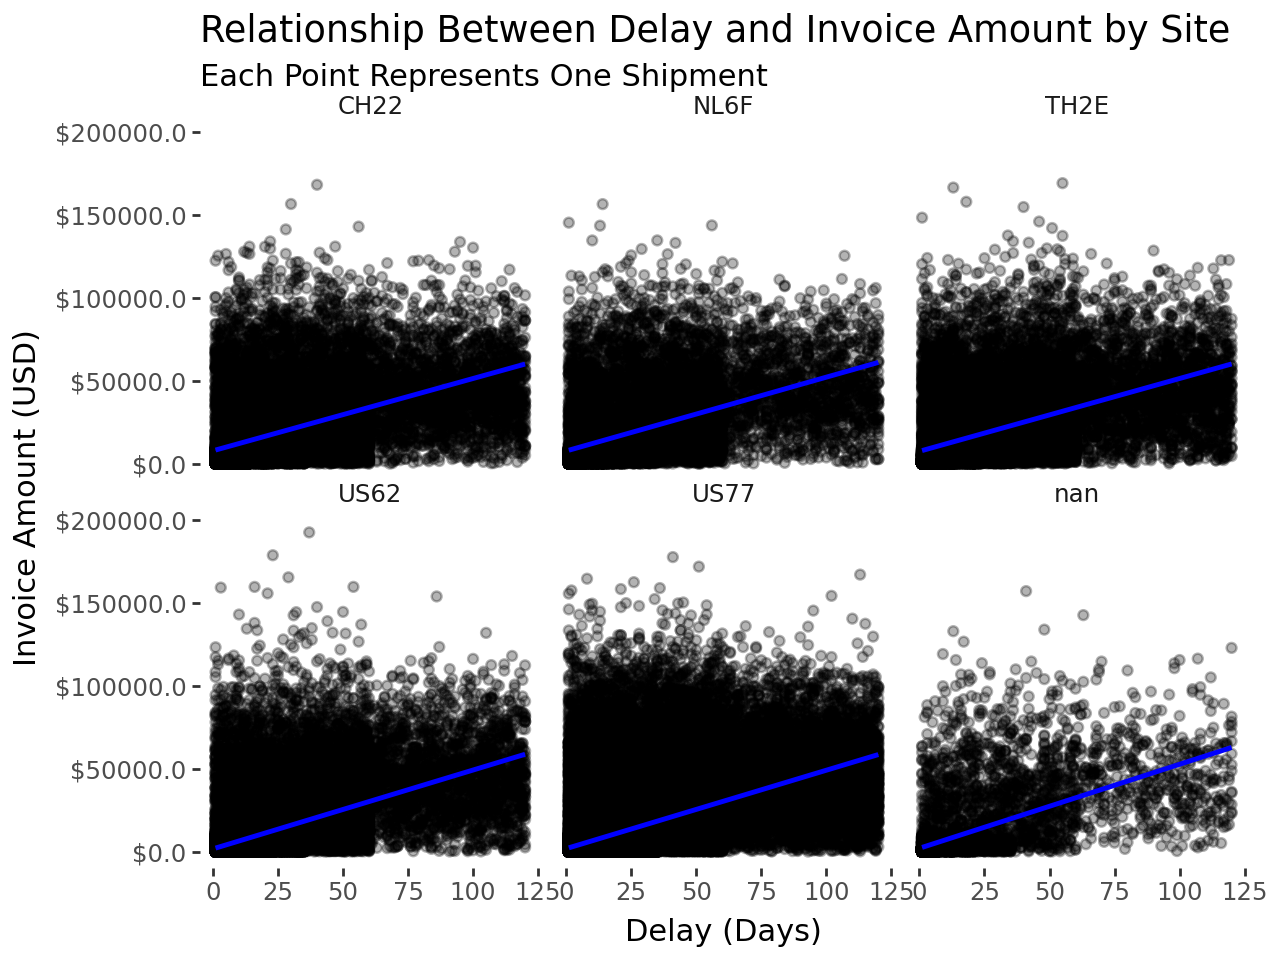

In [158]:
p_delay_invoice_site = ggplot(
    data=df, mapping=aes(x=df["delay"].dt.days, y="usda_invoice_amount")
)
(
    p_delay_invoice_site
    + geom_point(alpha=0.3)
    + geom_smooth(color="blue")
    + labs(
        title="Relationship Between Delay and Invoice Amount by Site",
        subtitle="Each Point Represents One Shipment ",
        x="Delay (Days)",
        y="Invoice Amount (USD)",
    )
    + scale_y_continuous(labels=lambda x: ["$" + str(val) for val in x])
    + facet_wrap("site")
    + theme_tufte()
)

**There is a clear positive relationship between delay and invoice amount in all sites**
- This scatterplot shows the relationship between delay and invoicing(in days) and the corresponding invoice amount (in $) in each site.   


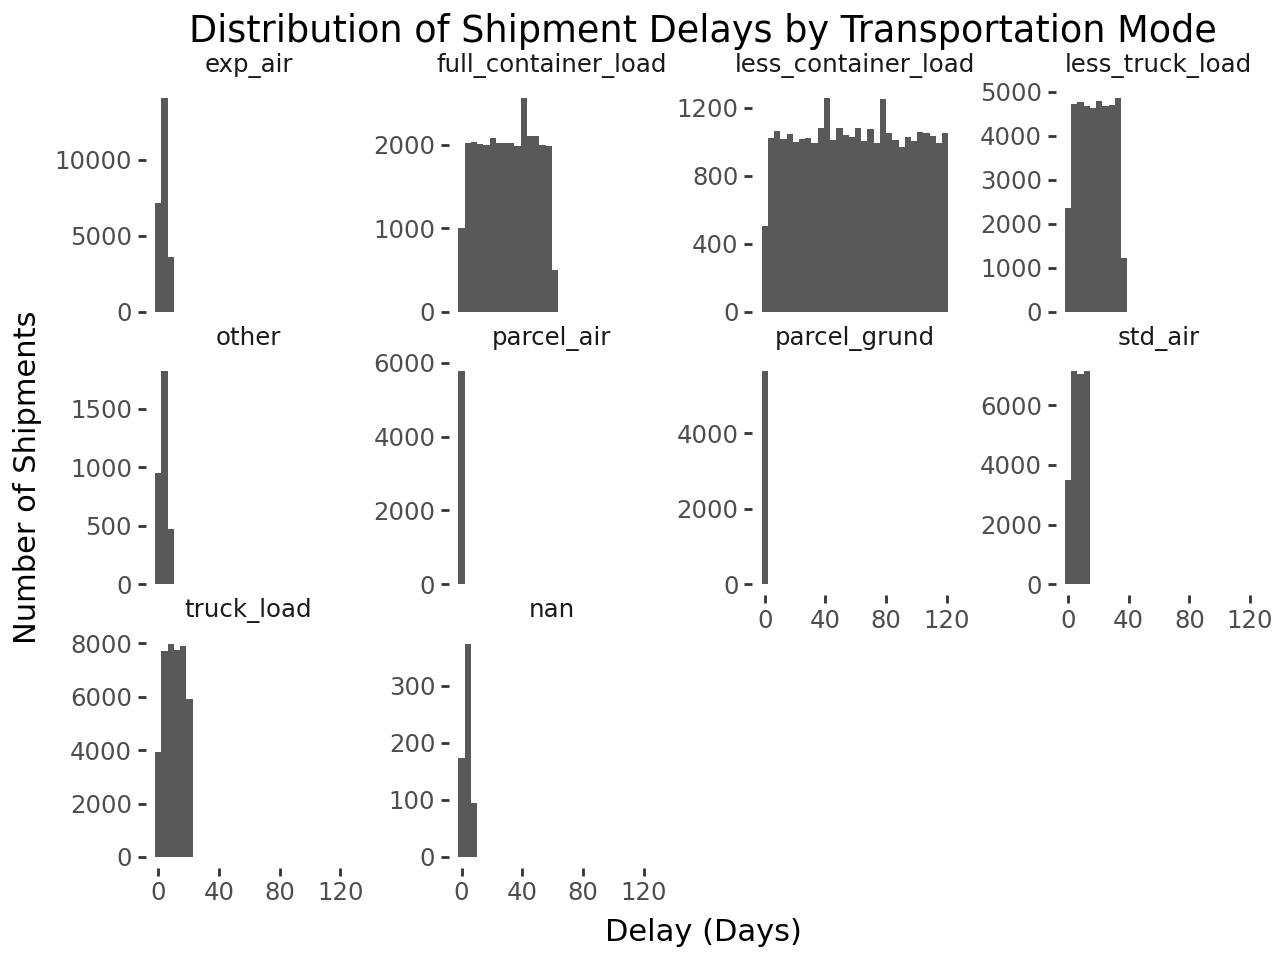

In [159]:
p_delay_mode = ggplot(data=df, mapping=aes(x=df["delay"].dt.days))
(
    p_delay_mode
    + geom_histogram(bins=30)
    + facet_wrap("mode", scales="free_y")
    + labs(
        title="Distribution of Shipment Delays by Transportation Mode",
        x="Delay (Days)",
        y="Number of Shipments",
    )
    + theme(figure_size=(14, 8))
    + theme_tufte()
)

Fascinating information here.  
we can see that Mode "less_than container_load has the most delays, as well as "full_container_load"  and  "less_truck_load.  
We will do more digging. 

In [160]:
df["mode"].value_counts()

mode
less_truck_load        41413
truck_load             41175
less_container_load    30843
full_container_load    30471
std_air                24820
exp_air                24755
parcel_air              5778
parcel_grund            5654
other                   3248
Name: count, dtype: int64

In [161]:
df.loc[df["delay"].dt.days > 60]

,site,mode,division,region,destination,shipping_date,invoice_date,usda_invoice_amount,delay
20,NL6F,less_container_load,D6C9,EMEA,Baghdad,2022-01-01,2022-04-25,13079.065685,114 days
21,US77,less_container_load,B13D,EMEA,Istanbul,2022-01-01,2022-03-12,5777.359943,70 days
42,US77,less_container_load,B13D,EMEA,Baghdad,2022-01-01,2022-03-05,254.805323,63 days
45,US77,less_container_load,98F8,APAC,Shanghai,2022-01-01,2022-04-22,28704.993289,111 days
46,CH22,less_container_load,0790,APAC,Delhi,2022-01-01,2022-04-06,24058.870154,95 days
...,...,...,...,...,...,...,...,...,...
208759,CH22,less_container_load,0790,AMER,New York,2024-12-30,2025-03-17,44573.771039,77 days
208760,CH22,less_container_load,0790,AMER,New York,2024-12-30,2025-04-11,50814.165984,102 days
208777,CH22,less_container_load,0790,AMER,Philadelphia,2024-12-30,2025-03-13,32686.597230,73 days
208778,US77,less_container_load,98F8,AMER,Dallas,2024-12-30,2025-04-22,42818.235826,113 days


 we notice all the delays are from mode less_container_load

In [162]:
df.groupby("mode")["delay"].agg(
    count="count", max_delay=lambda x: x.max().days
).sort_values("count", ascending=False)
# When prompted with "i want the max of each mode in this code df["mode"].value_counts() with out adding new columns"
# the ChatGPT-generated text gave me this code "df.groupby("mode")["delay"].agg(count="count", max_delay=lambda x: x.max().days).sort_values("count", ascending=False)"

,count,max_delay
mode,,
less_truck_load,41413,35
truck_load,41175,21
less_container_load,30843,120
full_container_load,30471,60
std_air,24820,14
exp_air,24755,7
parcel_air,5778,1
parcel_grund,5654,1
other,3248,7


this confirms my findings full_container_load & less_container_load & less_truck_load have the most signfint delays
Now we have to  visualize our findings
I was thinking about how we would show this to the manager/SCM, and thought we want to show them that these modes have the most delays on average
so that they might understand the certain modes cause the most delays, and maybe they can use other modes or further investigate the reason for the delay in these modes

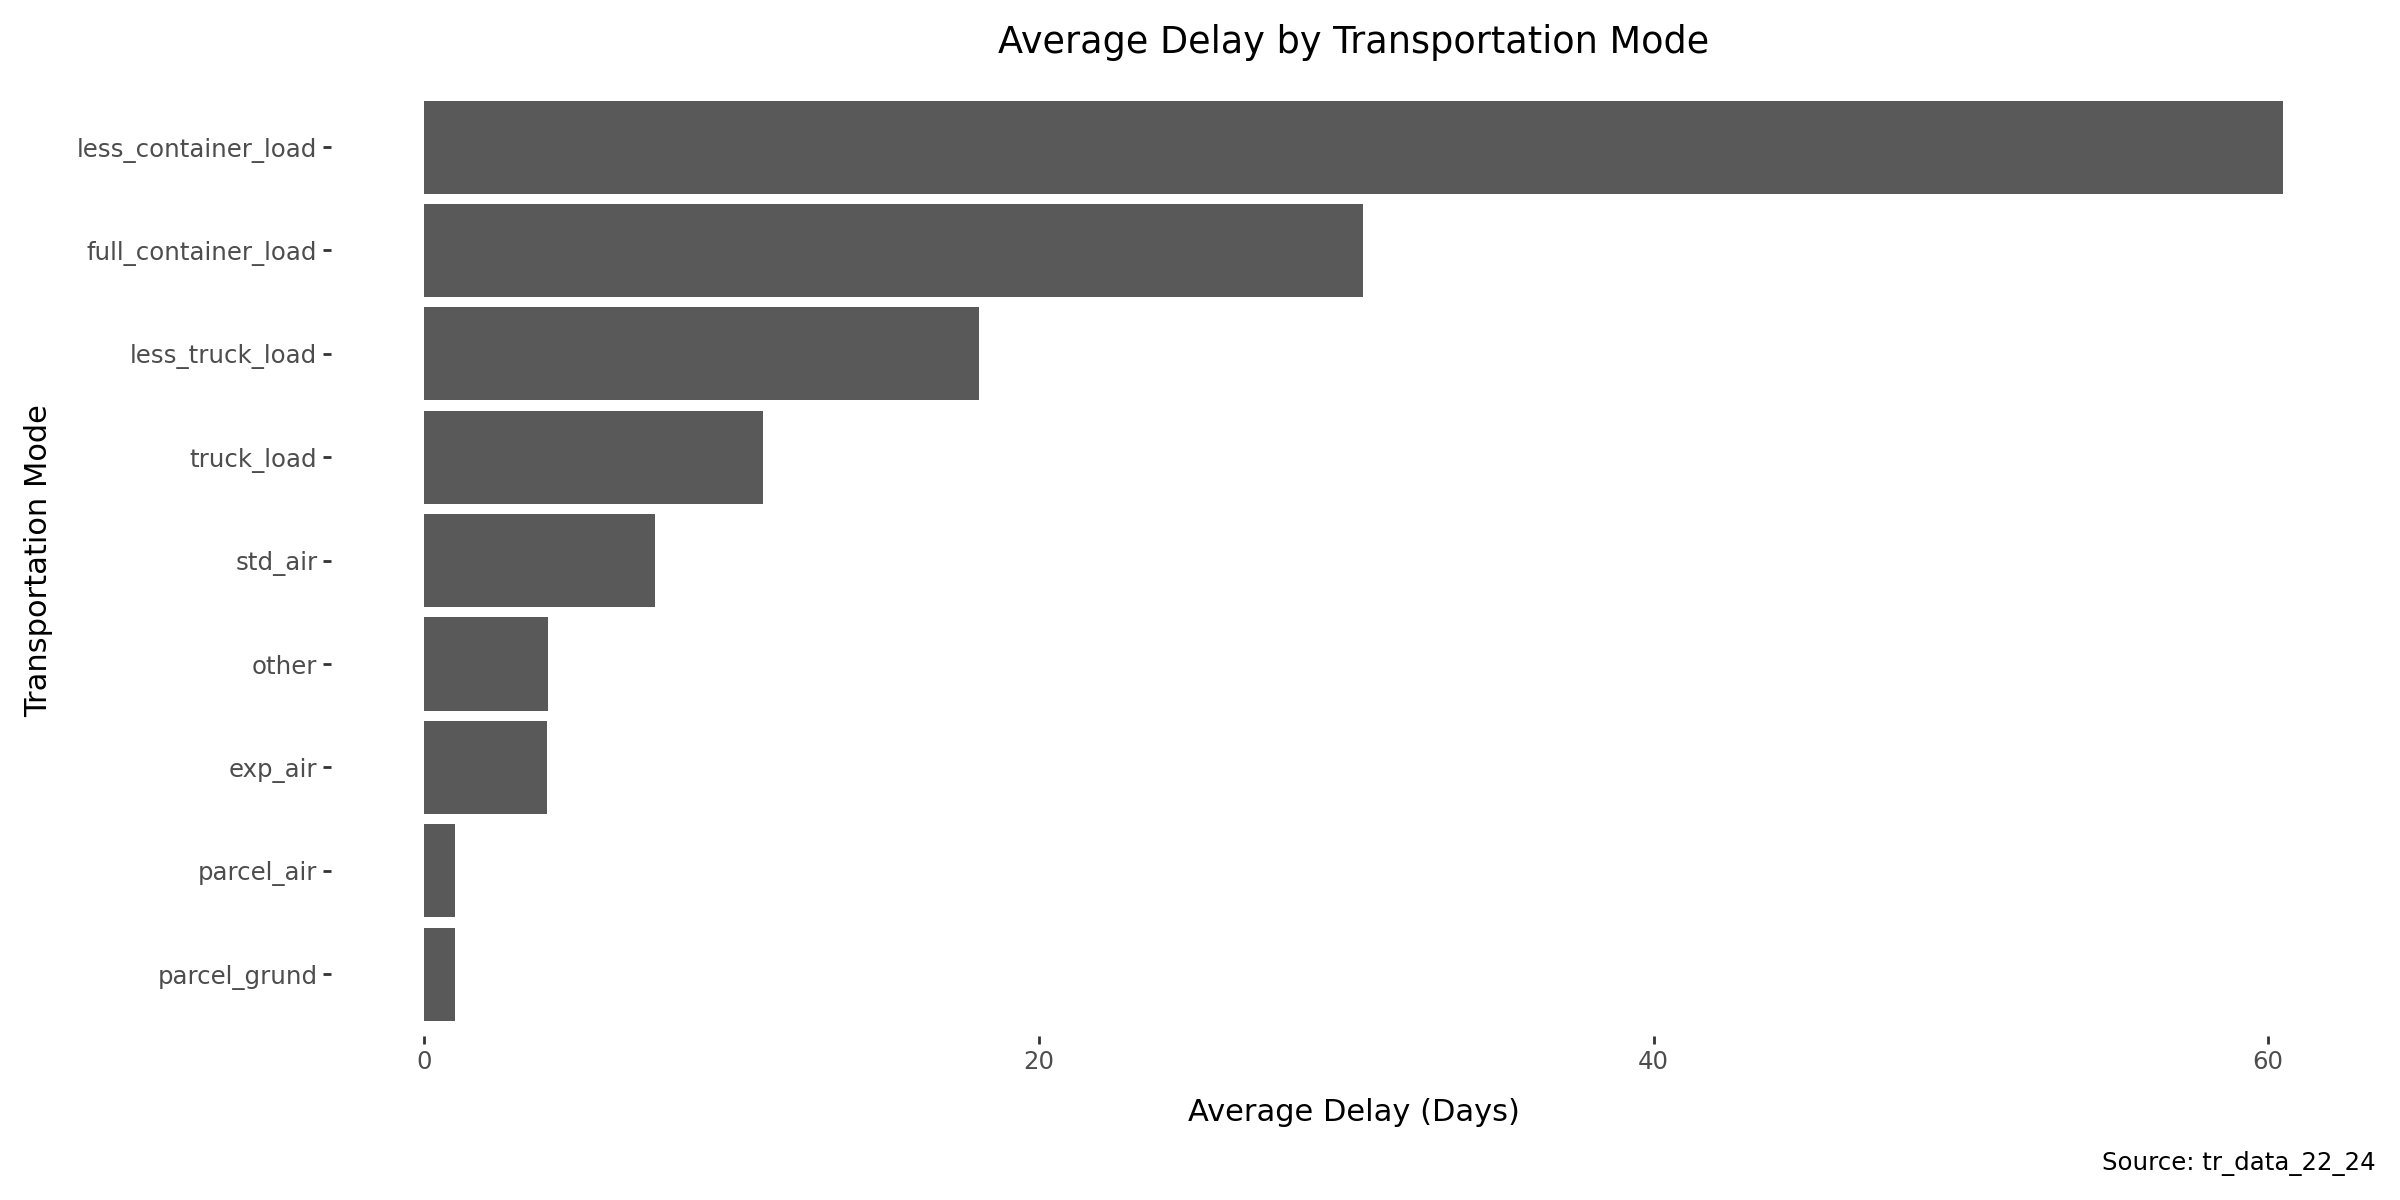

In [163]:
df["delay_days"] = df["delay"].dt.days

df_avg = df.groupby(["mode"], as_index=False).agg(avg_delay=("delay_days", "mean"))


p = ggplot(df_avg, aes(y="avg_delay", x="reorder(mode, avg_delay)"))

(
    p
    + geom_bar(stat="identity")
    + labs(
        x="Transportation Mode",
        y="Average Delay (Days)",
        title="Average Delay by Transportation Mode",
        caption="Source: tr_data_22_24",
    )
    + theme_tufte()
    + theme(figure_size=(12, 6), legend_position="top")
    + guides(fill=guide_legend(title="Avg over 18"))
    + coord_flip()
)

This visualization shows: The average delay of invoices in each Mode of transportation.  
I tried my best to make it  as simple as possilbe 

In [164]:
df["shipping_date"] = pd.to_datetime(df["shipping_date"])
df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["delay"] = df["invoice_date"] - df["shipping_date"]
df["delay_days"] = df["delay"].dt.days

In [165]:
# Removing NA , "other" values from data
df_clean = df.dropna(subset=["mode"])
df_clean = df_clean[df_clean["mode"] != "other"]

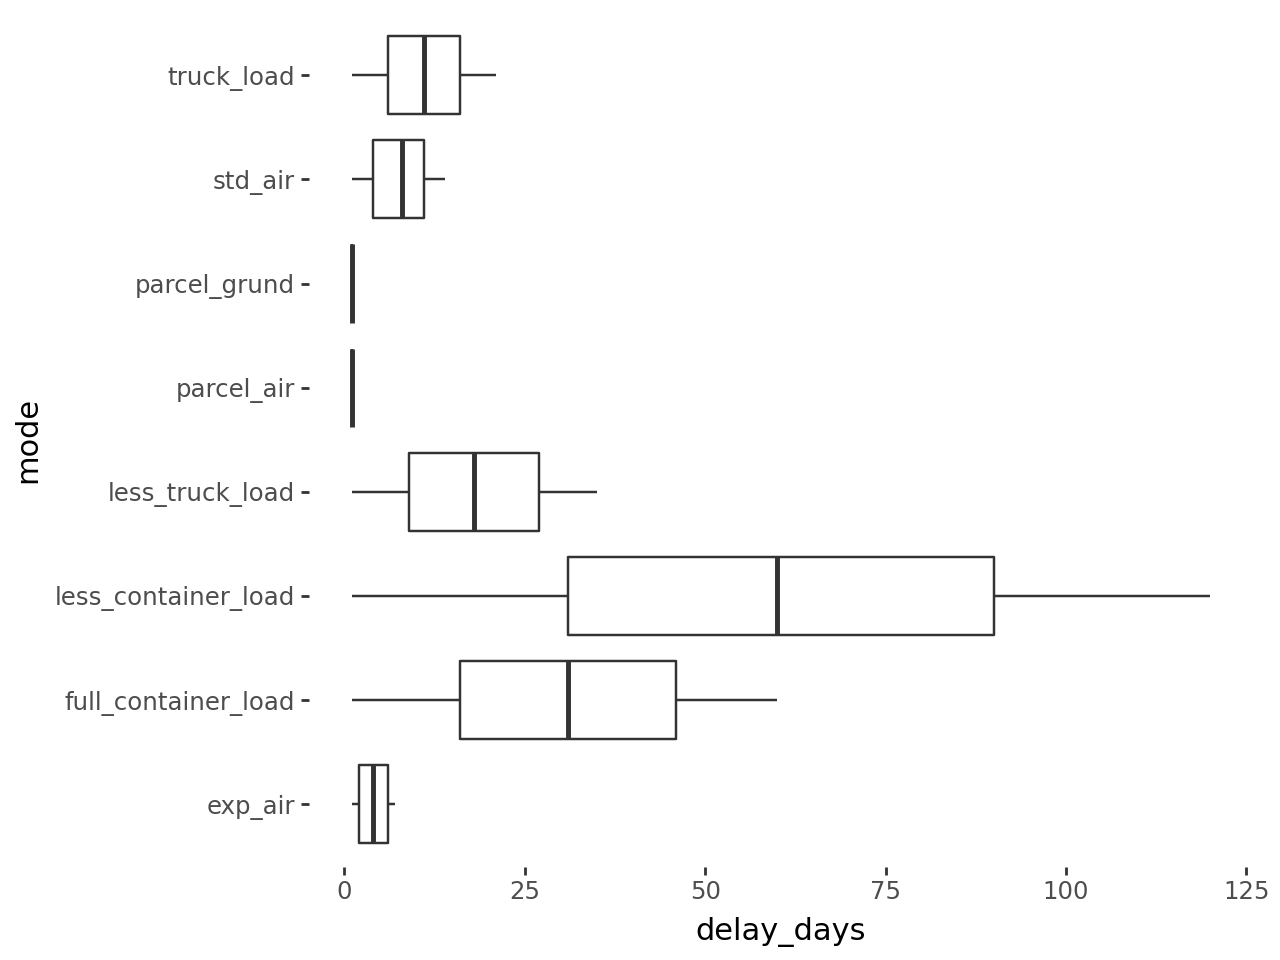

In [ ]:
p = (
    (ggplot(df_clean, aes(x="mode", y="delay_days")) + geom_boxplot())
    + coord_flip()
    + theme_tufte()
)
p

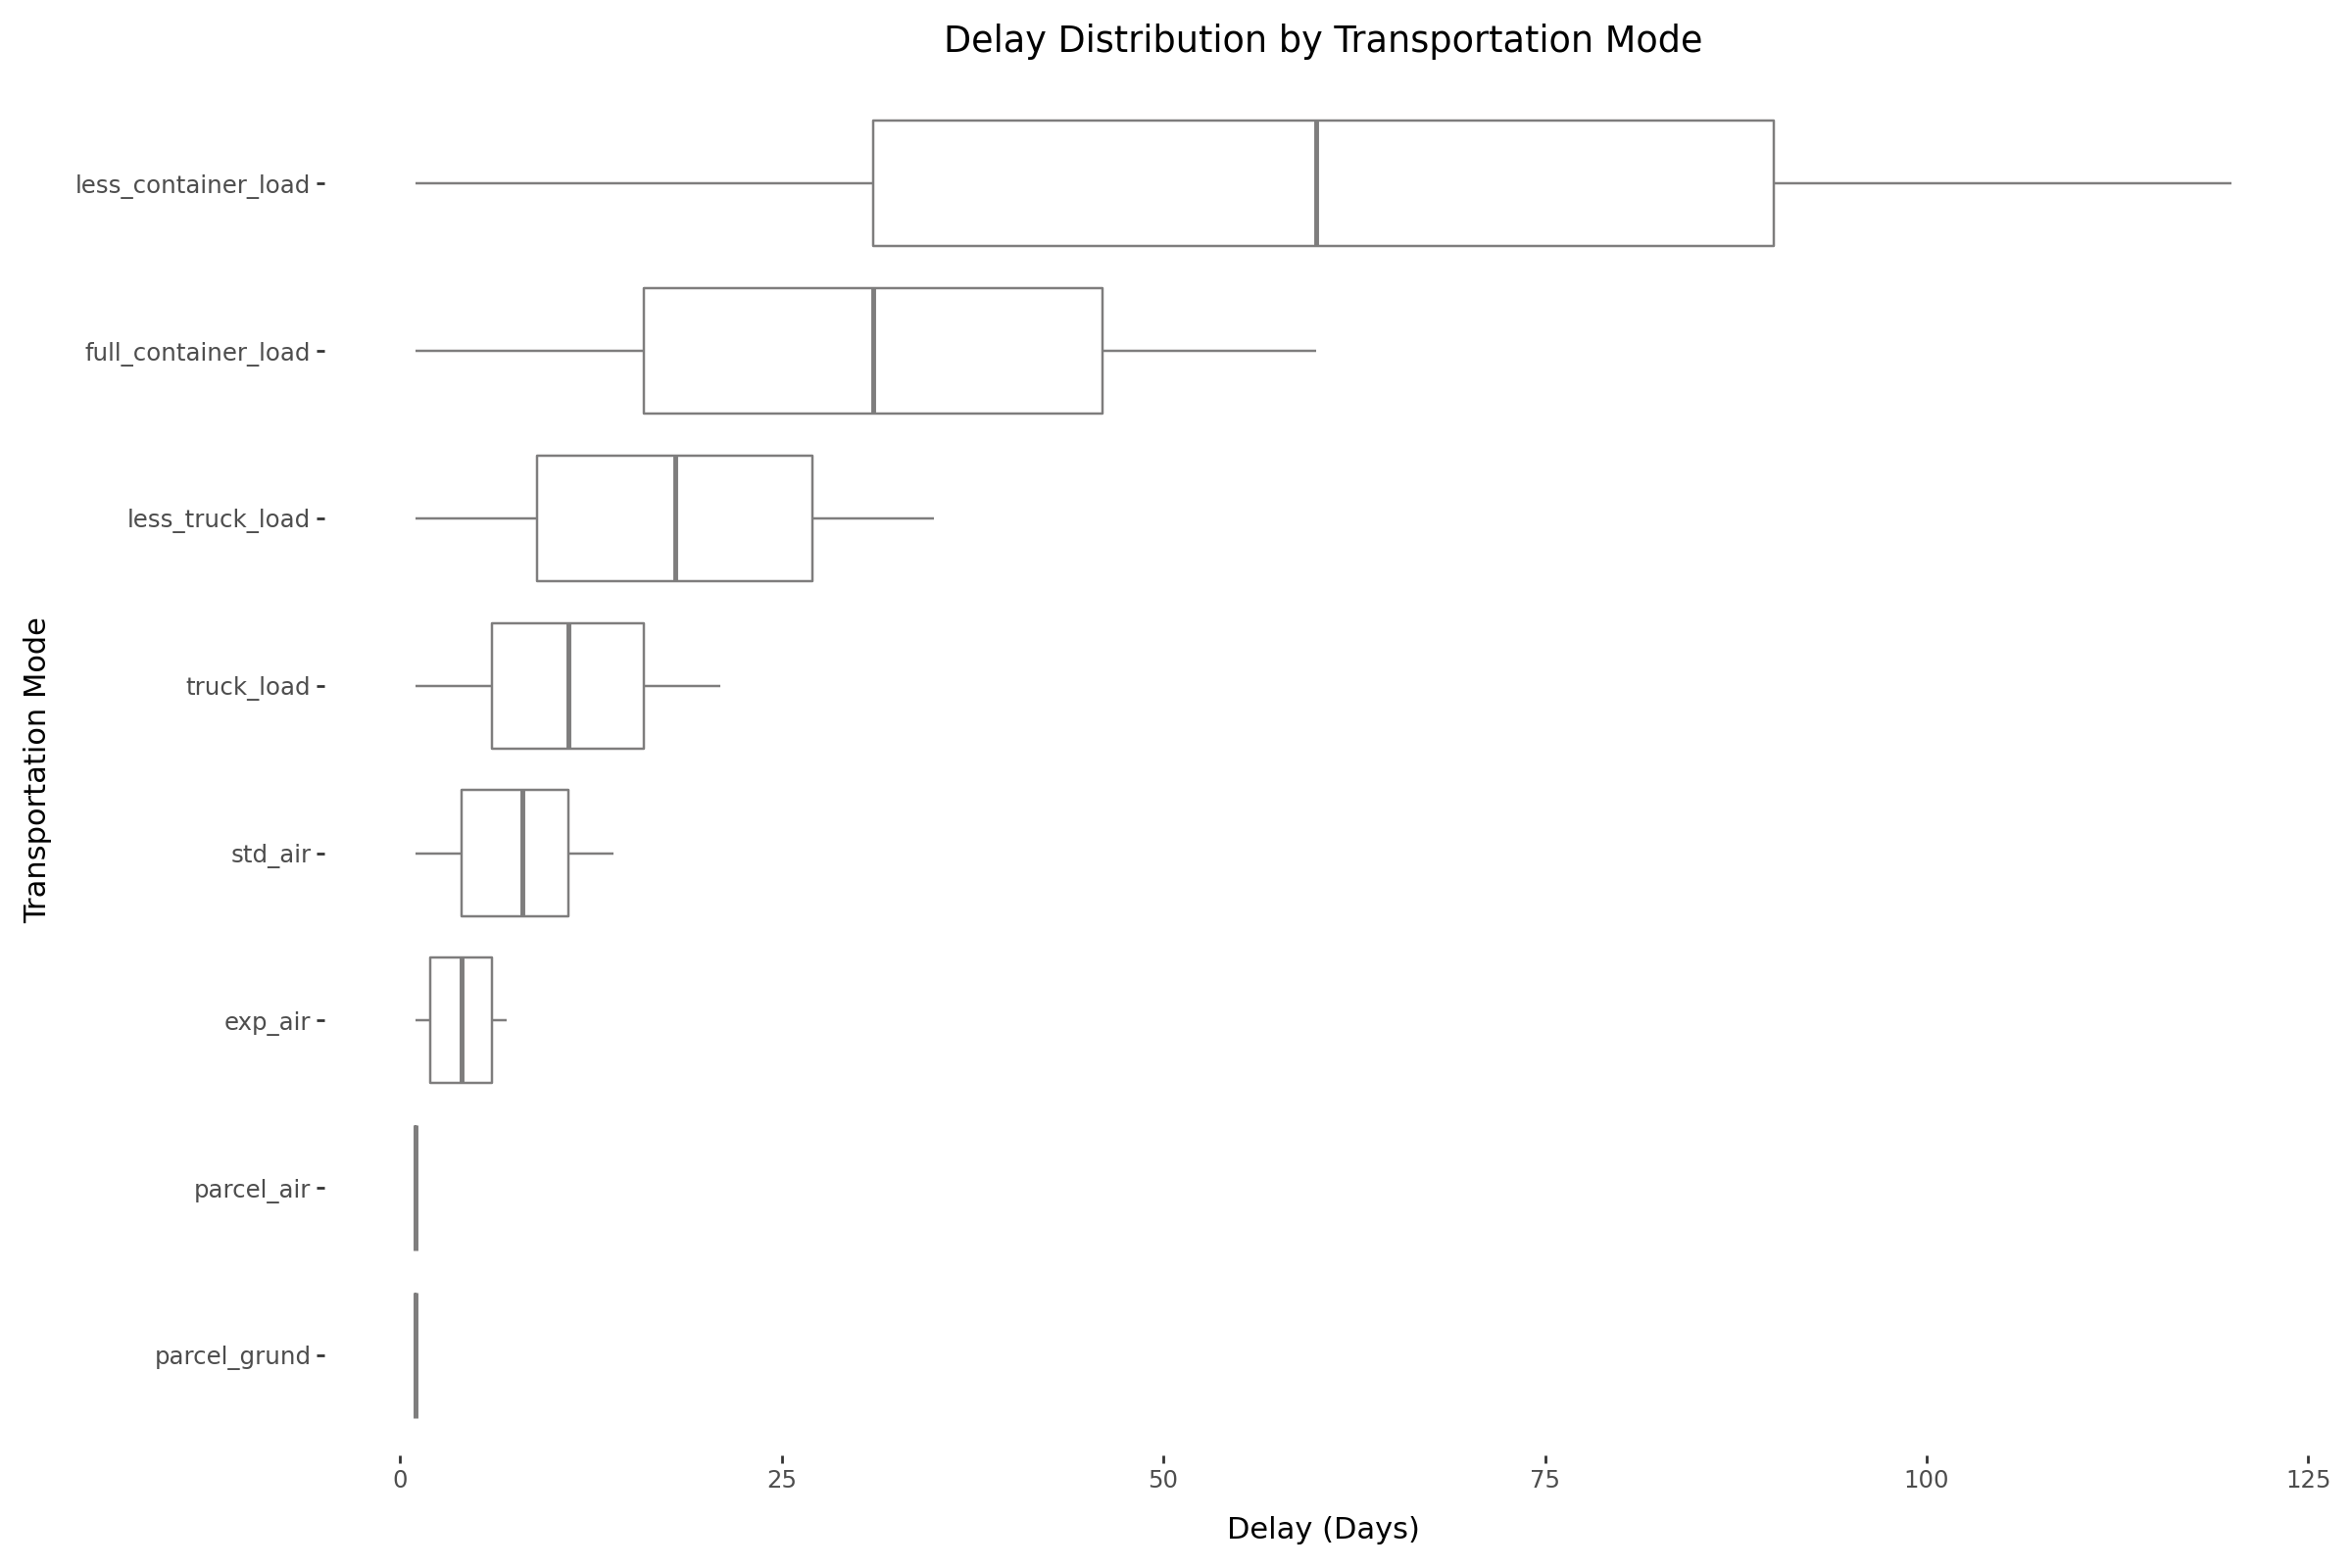

In [167]:
# Added Labs and tried multipale themes to increase data to ink ratio but found tufte to be the best, also i like to make the figuer bigger to see details better

p = (
    ggplot(df_clean, aes(x="reorder(mode, delay_days, np.median)", y="delay_days"))
    + geom_boxplot(color="#7e7d7d")
    + coord_flip()
    + labs(
        title="Delay Distribution by Transportation Mode",
        x="Transportation Mode",
        y="Delay (Days)",
    )
    + theme_tufte()
    + theme(figure_size=(12, 8))
)

p

In [184]:
ggsave(
    p,
    filename="/Users/ghass/OneDrive - California State University San Marcos/OM-621-Assignments/OM-621-Assignments/plots/"
    + "delay_dist_by_mode.png",
    height=6,
    width=10,
    units="in",
    dpi=300,
)

C:\Users\ghass\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\plotnine\ggplot.py:630: PlotnineWarning: Saving 10 x 6 in image.
C:\Users\ghass\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\plotnine\ggplot.py:631: PlotnineWarning: Filename: /Users/ghass/OneDrive - California State University San Marcos/OM-621-Assignments/OM-621-Assignments/plots/delay_dist_by_mode.png


In [169]:
df_sum = df_clean.groupby(["shipping_date"], as_index=False).agg(
    invoice_sum=("usda_invoice_amount", "sum")
)

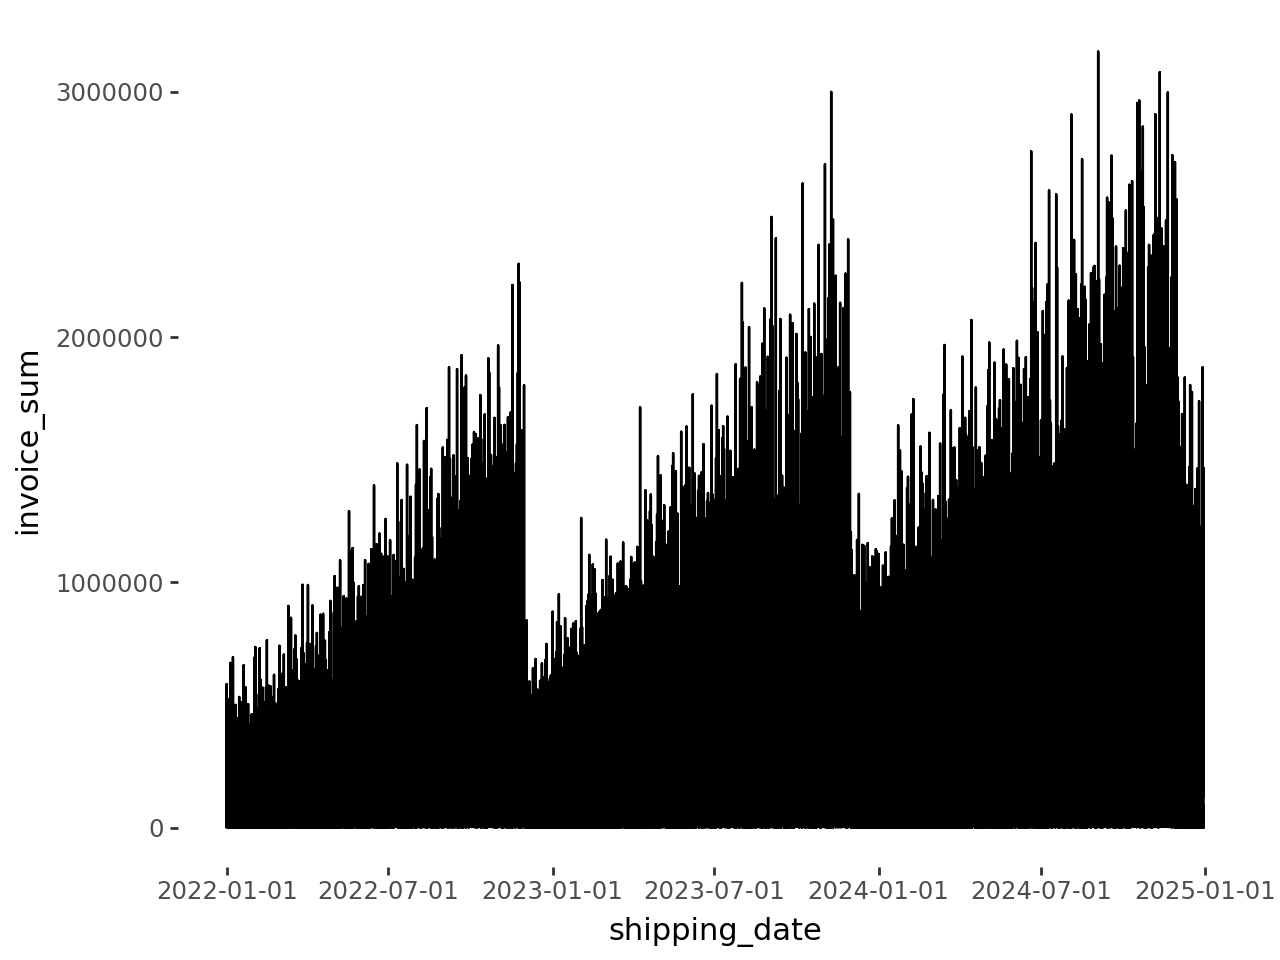

In [ ]:
p1 = (
    ggplot(df_sum, aes(x="shipping_date", y="invoice_sum"))
    + geom_line()
    + theme_tufte()
)
p1

While this plot shows a good indication of seasonality and changes in invoice amounts over certain periods, it is too volatile and makes it difficult to compare year over year, as it combines all the years together. I will address all of these issues in the next plot.

In [171]:
df_sum["year"] = df_sum["shipping_date"].dt.year
df_sum["month"] = df_sum["shipping_date"].dt.to_period("M").dt.to_timestamp()

df_monthly = df_sum.groupby(["month", "year"], as_index=False).agg(
    invoice_sum=("invoice_sum", "sum")
)
df_monthly["month_num"] = df_monthly["month"].dt.month.astype(int)

In [172]:
df_sum.head()

,shipping_date,invoice_sum,year,month
0,2022-01-01,1.262101e+06,2022,2022-01-01
1,2022-01-02,9.665205e+05,2022,2022-01-01
2,2022-01-03,8.986529e+05,2022,2022-01-01
3,2022-01-04,9.386941e+05,2022,2022-01-01
4,2022-01-05,9.773424e+05,2022,2022-01-01


In [173]:
df_monthly.head()

,month,year,invoice_sum,month_num
0,2022-01-01,2022,2.881836e+07,1
1,2022-02-01,2022,3.145330e+07,2
2,2022-03-01,2022,4.130481e+07,3
3,2022-04-01,2022,4.365691e+07,4
4,2022-05-01,2022,5.462408e+07,5


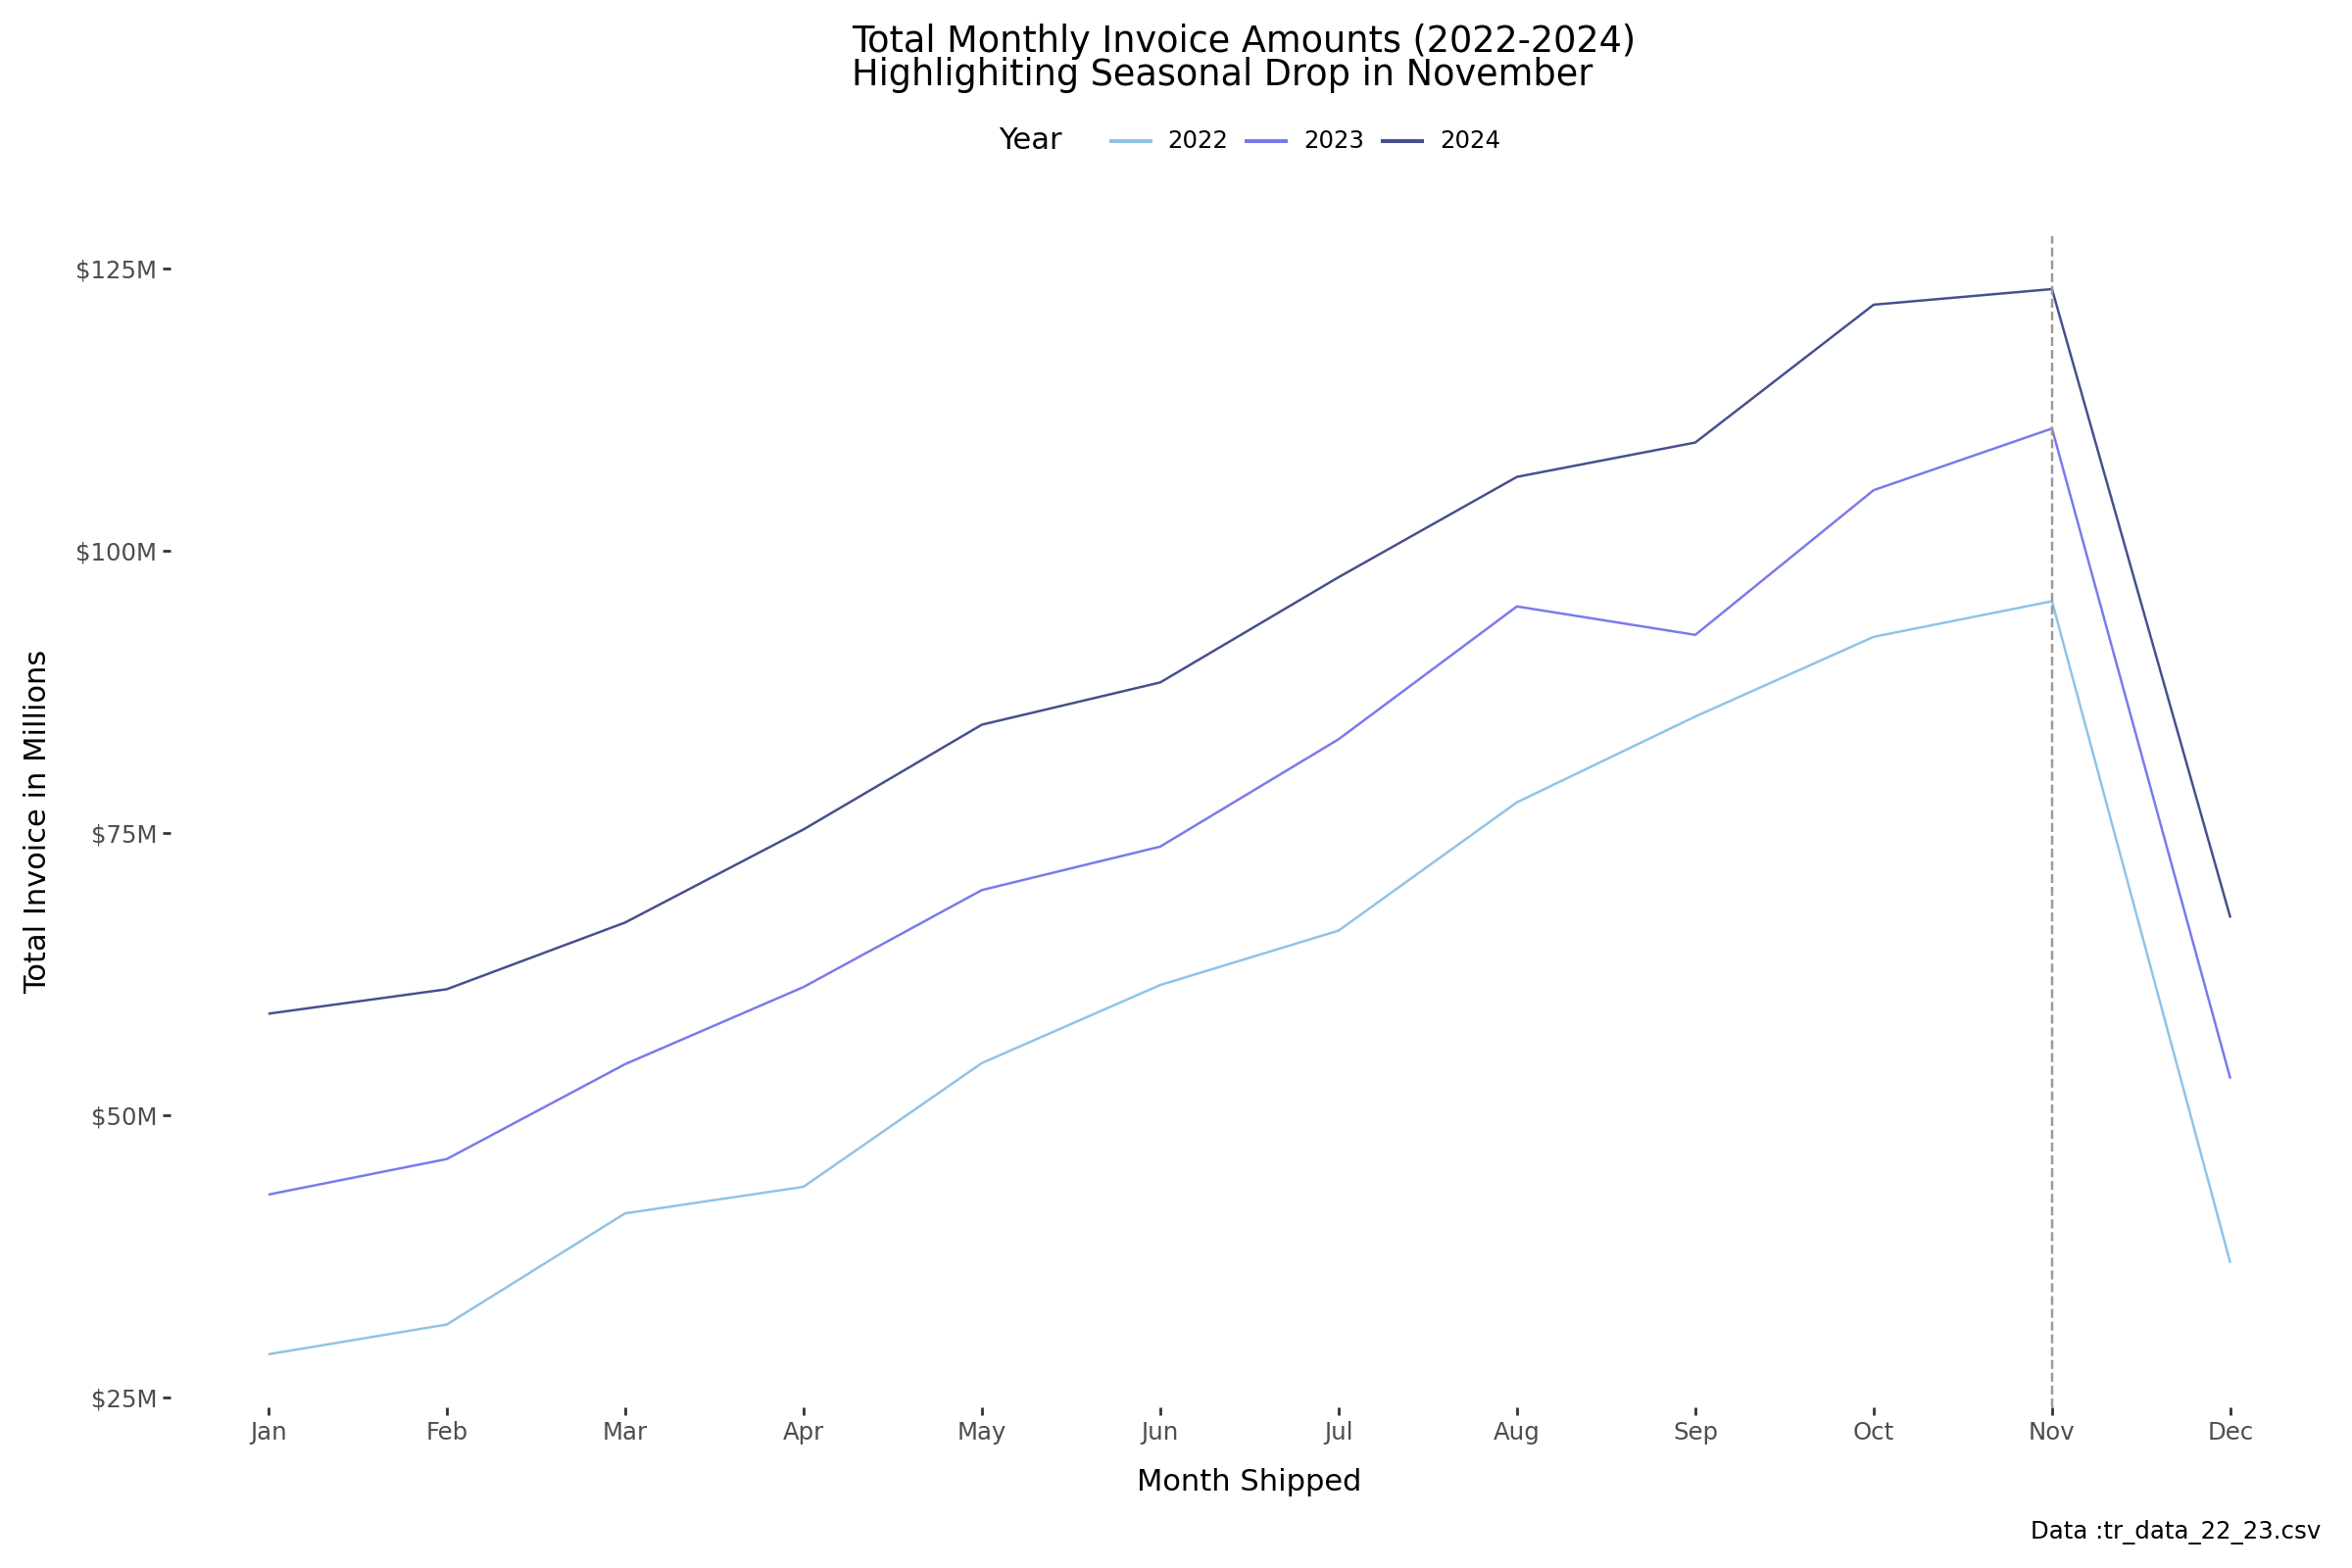

In [ ]:
p1 = (
    ggplot(
        df_monthly,
        aes(x="month_num", y="invoice_sum", group="year", color="factor(year)"),
    )
    + geom_line(alpha=0.75)
    + geom_vline(xintercept=11, linetype="dashed", color="#9c9999")
    + theme_tufte()
    + scale_x_continuous(
        breaks=range(1, 13),
        labels=[
            "Jan",
            "Feb",
            "Mar",
            "Apr",
            "May",
            "Jun",
            "Jul",
            "Aug",
            "Sep",
            "Oct",
            "Nov",
            "Dec",
        ],
    )
    + labs(
        title="Total Monthly Invoice Amounts (2022-2024) \nHighlighiting Seasonal Drop in November",
        x="Month Shipped",
        y="Total Invoice in Millions",
        color="Year",
        caption="Data :tr_data_22_23.csv ",
    )
    + theme(legend_position="top")
    + scale_y_continuous(labels=lambda l: [f"${x/1000000:.0f}M" for x in l])
    + scale_color_manual(values=["#6AAFE0", "#4b4de6", "#081468"])
    + theme(figure_size=(12, 8))
)
p1

In this plot, we show the monthly invoice amounts for each year to better understand seasonality changes and highlight the change in November, while also illustrating the year-over-year growth.

In [183]:
ggsave(
    p1,
    filename="/Users/ghass/OneDrive - California State University San Marcos/OM-621-Assignments/OM-621-Assignments/plots/"
    + "monthly_invoice_by_year.png",
    height=6,
    width=10,
    units="in",
    dpi=300,
)

C:\Users\ghass\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\plotnine\ggplot.py:630: PlotnineWarning: Saving 10 x 6 in image.
C:\Users\ghass\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\plotnine\ggplot.py:631: PlotnineWarning: Filename: /Users/ghass/OneDrive - California State University San Marcos/OM-621-Assignments/OM-621-Assignments/plots/monthly_invoice_by_year.png


The time series clearly indicates a steady rise in invoice amounts from January to November, followed by a sharp drop in December and a recovery in January, demonstrating a consistent seasonal demand cycle.
Since this seasonality pattern is consistent across all years, we can use predictive modeling techniques such as moving averages or seasonal ARIMA models to forecast future trends. These models can help anticipate higher costs in the months leading up to November and lower costs from November through January.
Additionally, the patterns do not differ by mode. I will include a chart for each mode below to show that the seasonality applies across all modes, indicating that mode is not a contributing factor to this seasonal behavior.

In [176]:
df_sum = df_clean.groupby(["shipping_date", "mode"], as_index=False).agg(
    invoice_sum=("usda_invoice_amount", "sum")
)

C:\Users\ghass\AppData\Local\Temp\ipykernel_10632\1329932598.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


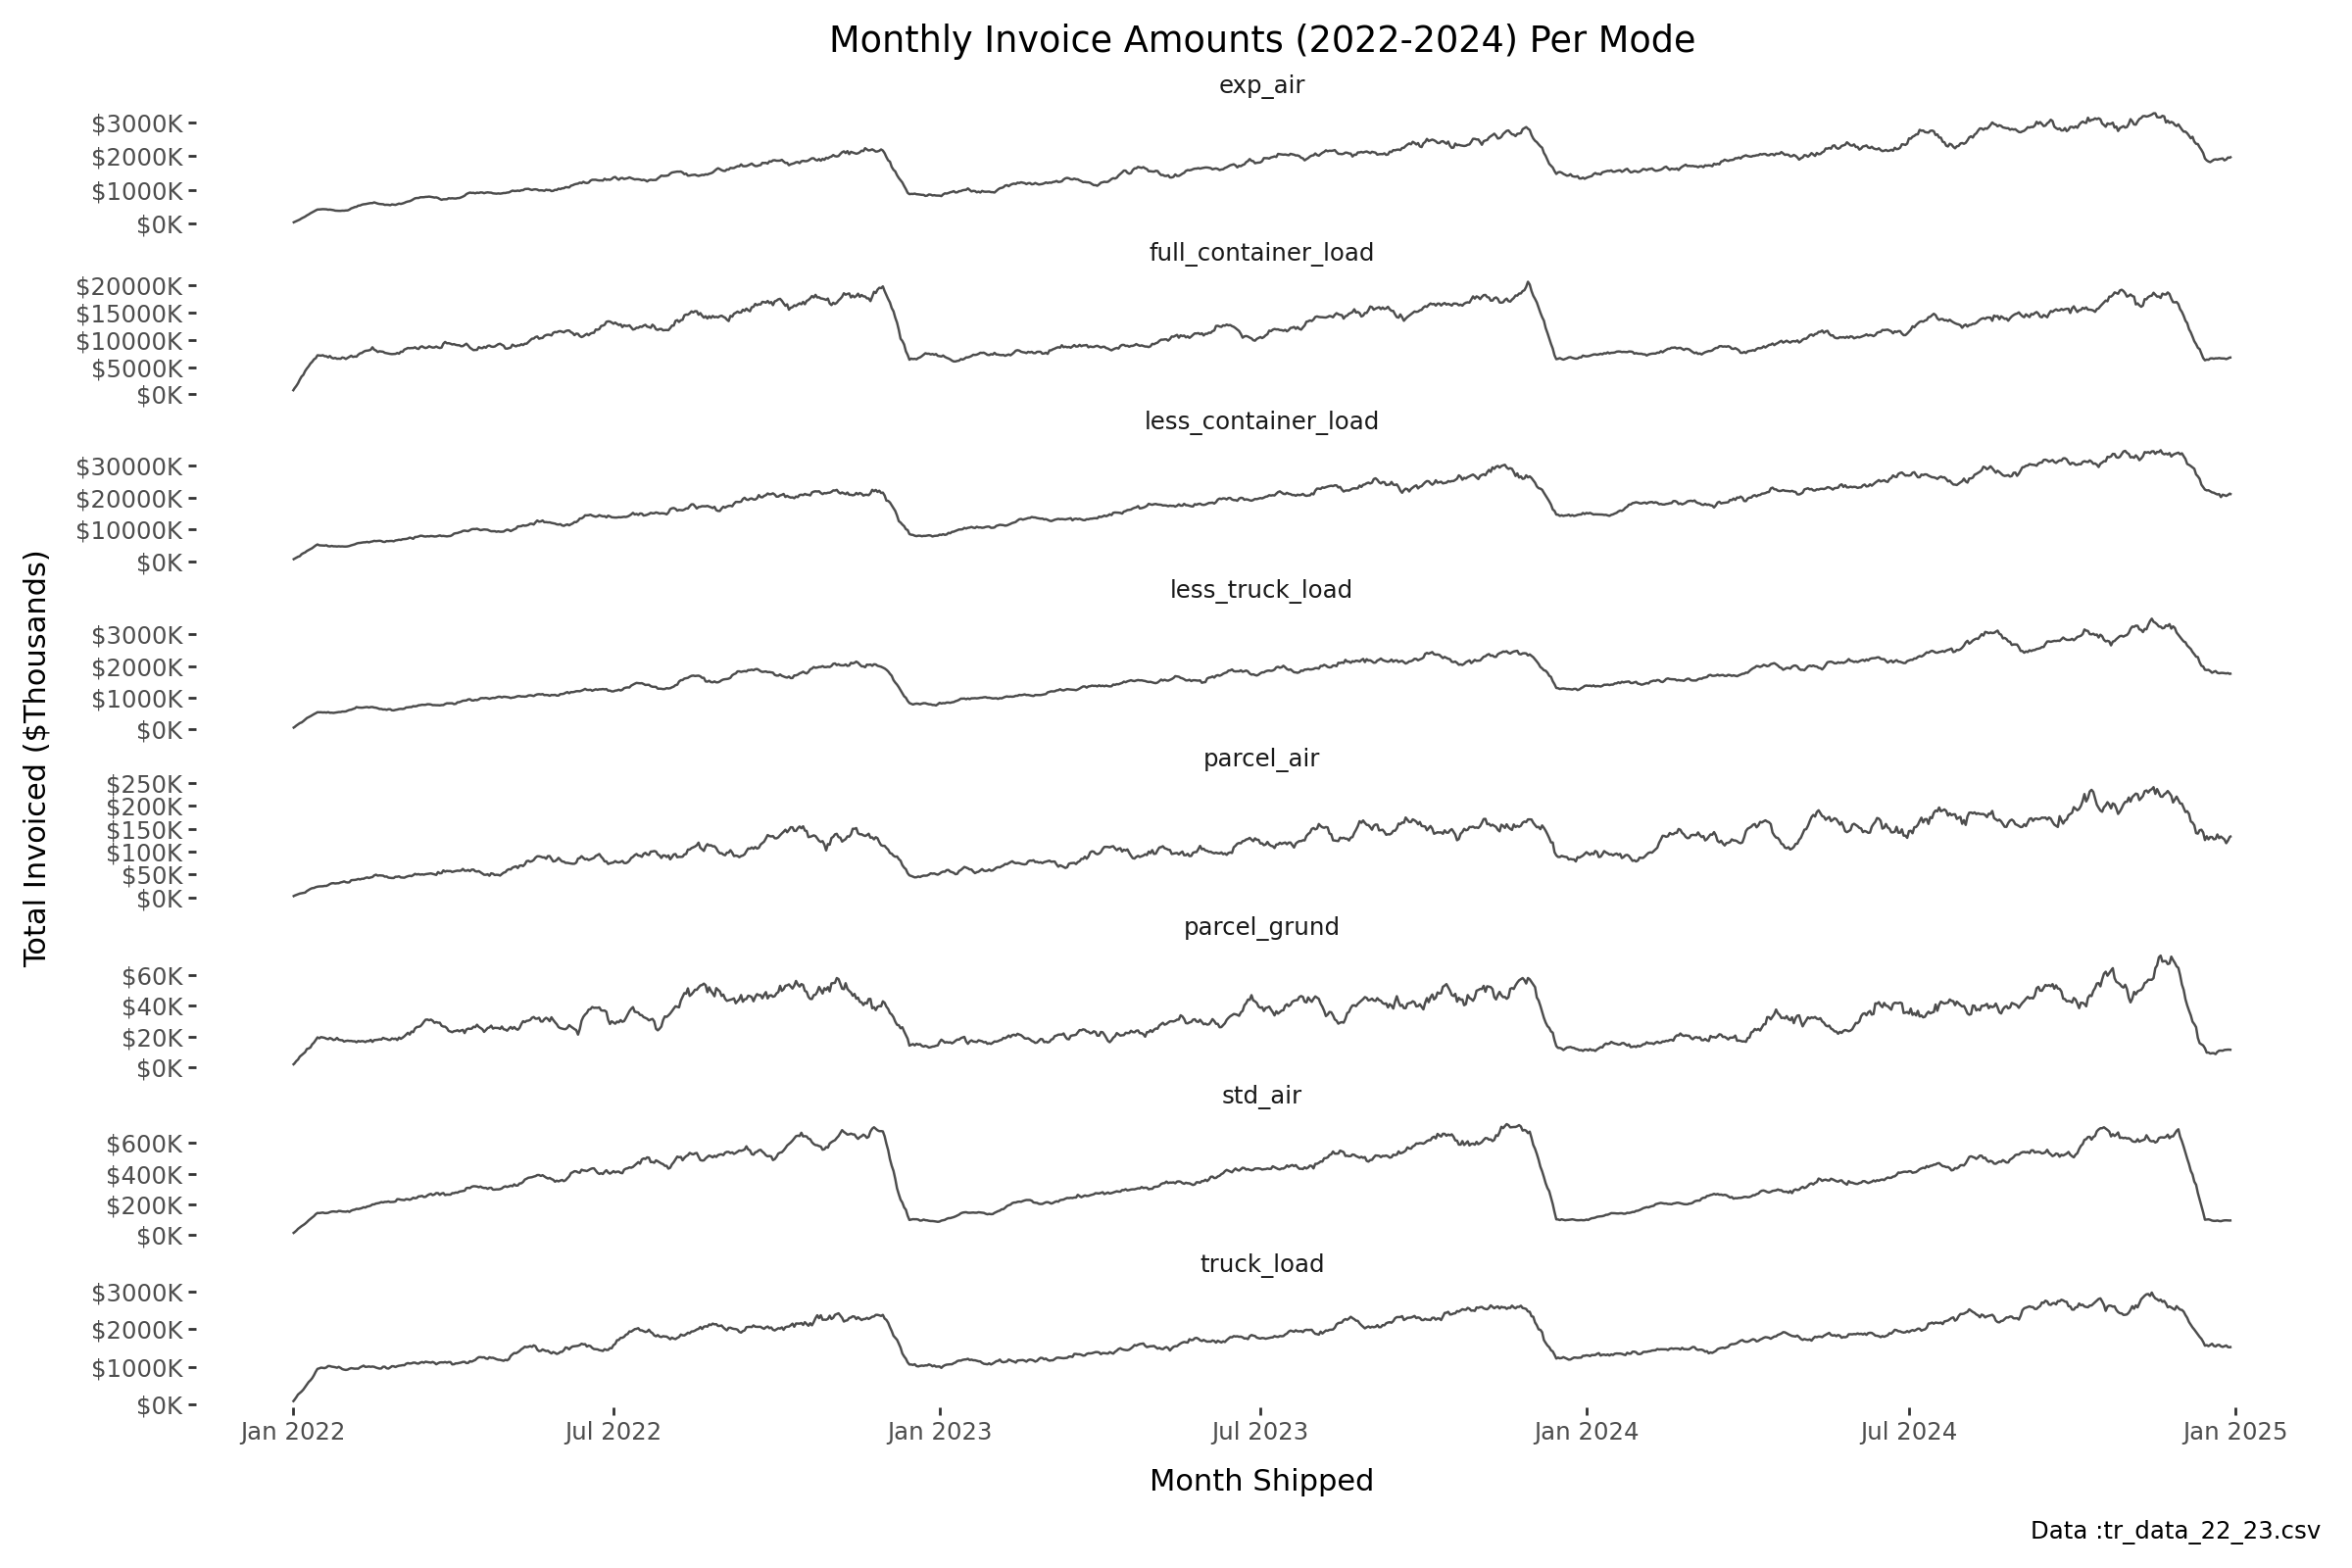

In [ ]:
df_smooth = (
    df_sum.sort_values(["mode", "shipping_date"])
    .groupby("mode", group_keys=False)
    .apply(
        lambda x: x.assign(
            invoice_sum_smooth=x["invoice_sum"].rolling(window=15, min_periods=1).sum()
        )
    )
)

p2 = (
    ggplot(df_smooth, aes(x="shipping_date", y="invoice_sum_smooth"))
    + geom_line(aes(group="mode"), alpha=0.7)
    + facet_wrap("mode", scales="free_y", ncol=1)
    + scale_x_date(date_labels="%b %Y")
    + theme_tufte()
    + labs(
        title="Monthly Invoice Amounts (2022-2024) Per Mode",
        x="Month Shipped",
        y="Total Invoiced ($Thousands)",
        color="Year",
        caption="Data :tr_data_22_23.csv ",
    )
    + scale_y_continuous(labels=lambda l: [f"${x/1000:.0f}K" for x in l])
    + theme(figure_size=(12, 8))
)
p2

This plot shows a clear and consistent seasonal pattern in invoice amounts. This seasonality appears both in the overall total invoice values and within each individual transportation mode. Across years, shipment costs generally begin at lower levels, gradually increase throughout the year, peak toward December, and then decline back to levels similar to those at the start of the year. Which can help is choosing an apporecasting model.